In [246]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator

# Load the datasets
essay_df = pd.read_csv('backend_essay - backend_essay.csv')
metric_df = pd.read_csv('backend_metric.csv')
metriccategory_df = pd.read_csv('backend_metriccategory.csv')
classroom_students_df = pd.read_csv('classroom_students - backend_classroom_students.csv')
essay_score_df = pd.read_csv('backend_essayscore - backend_essayscore.csv')

# Display the first few rows of each dataframe to understand their structure
essay_df.head(), metric_df.head(), metriccategory_df.head(), classroom_students_df.head(), essay_score_df.head()

(   id                                              essay submission_type  \
 0  80  Argue for the inclusion of critical thinking e...       1st Draft   
 1  85  As the world grapples with environmental degra...       1st Draft   
 2  86  In an increasingly interconnected world, the d...       1st Draft   
 3  87  In today's interconnected world, the debate be...       2nd Draft   
 4  88  In an increasingly interconnected world, the d...       1st Draft   
 
      state        submitted_on  student_id  task_id  is_reviewed  \
 0  Teacher   7/9/2024 17:00:00           9      109        False   
 1  Teacher  7/10/2024 17:00:00           3       90         True   
 2  Teacher  7/10/2024 17:00:00           3       89        False   
 3  Teacher  7/10/2024 17:00:00           3       89        False   
 4  Teacher  7/10/2024 17:00:00           4       89        False   
 
                                           essay_html  classroom_id  
 0  <p><span style="color:rgb(33, 37, 41);">Argue 

In [248]:
essay_df.info(), metric_df.info(), metriccategory_df.info(), classroom_students_df.info(), essay_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               230 non-null    int64 
 1   essay            230 non-null    object
 2   submission_type  230 non-null    object
 3   state            230 non-null    object
 4   submitted_on     230 non-null    object
 5   student_id       230 non-null    int64 
 6   task_id          230 non-null    int64 
 7   is_reviewed      230 non-null    bool  
 8   essay_html       230 non-null    object
 9   classroom_id     230 non-null    int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 39 non-null     int64 
 1   name               39 non-null     object
 2   

(None, None, None, None, None)

In [250]:
print(essay_score_df['score'])

0         3.00
1         0.00
2         3.68
3         5.95
4        62.00
         ...  
8681     62.00
8682    134.00
8683     18.61
8684      2.63
8685      2.30
Name: score, Length: 8686, dtype: float64


In [251]:
# Compare common elements
# Merge essay_df with essay_score_df on essay_id
merged_essay_score_df = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id')

# Merge the result with metric_df on metric_id
merged_essay_score_metric_df = pd.merge(merged_essay_score_df, metric_df, left_on='metric_id', right_on='id')

# Merge metric_df with metriccategory_df on category_id
merged_metric_category_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id')

# Merge essay_df with classroom_students_df on classroom_id
merged_essay_classroom_df = pd.merge(essay_df, classroom_students_df, left_on='classroom_id', right_on='classroom_id')

# Display the first few rows of each merged dataframe
merged_essay_score_df.head(), merged_essay_score_metric_df.head(), merged_metric_category_df.head(), merged_essay_classroom_df.head()

(   id_x                                              essay submission_type  \
 0    80  Argue for the inclusion of critical thinking e...       1st Draft   
 1    80  Argue for the inclusion of critical thinking e...       1st Draft   
 2    85  As the world grapples with environmental degra...       1st Draft   
 3    85  As the world grapples with environmental degra...       1st Draft   
 4    85  As the world grapples with environmental degra...       1st Draft   
 
      state        submitted_on  student_id  task_id  is_reviewed  \
 0  Teacher   7/9/2024 17:00:00           9      109        False   
 1  Teacher   7/9/2024 17:00:00           9      109        False   
 2  Teacher  7/10/2024 17:00:00           3       90         True   
 3  Teacher  7/10/2024 17:00:00           3       90         True   
 4  Teacher  7/10/2024 17:00:00           3       90         True   
 
                                           essay_html  classroom_id  id_y  \
 0  <p><span style="color:rgb(3

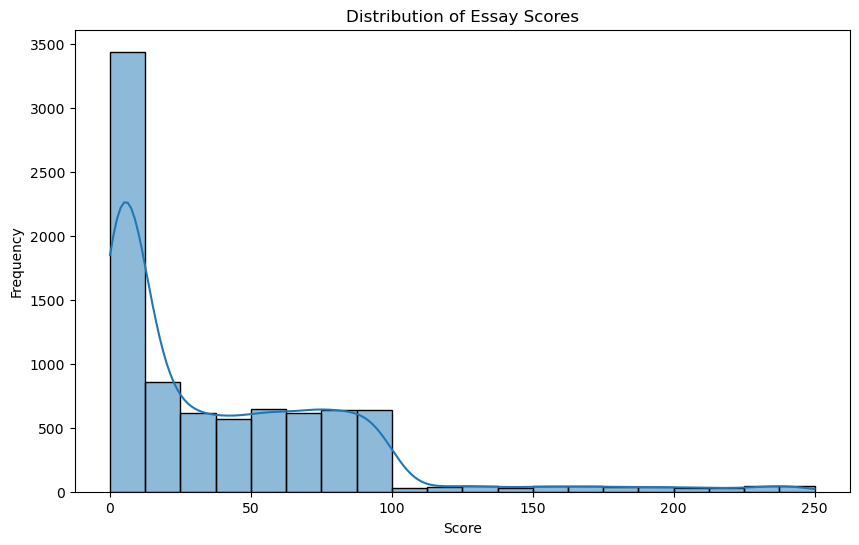

In [254]:
# Distribution of Essay Scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_essay_score_df['score'], bins=20, kde=True)
plt.title('Distribution of Essay Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/346252782.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




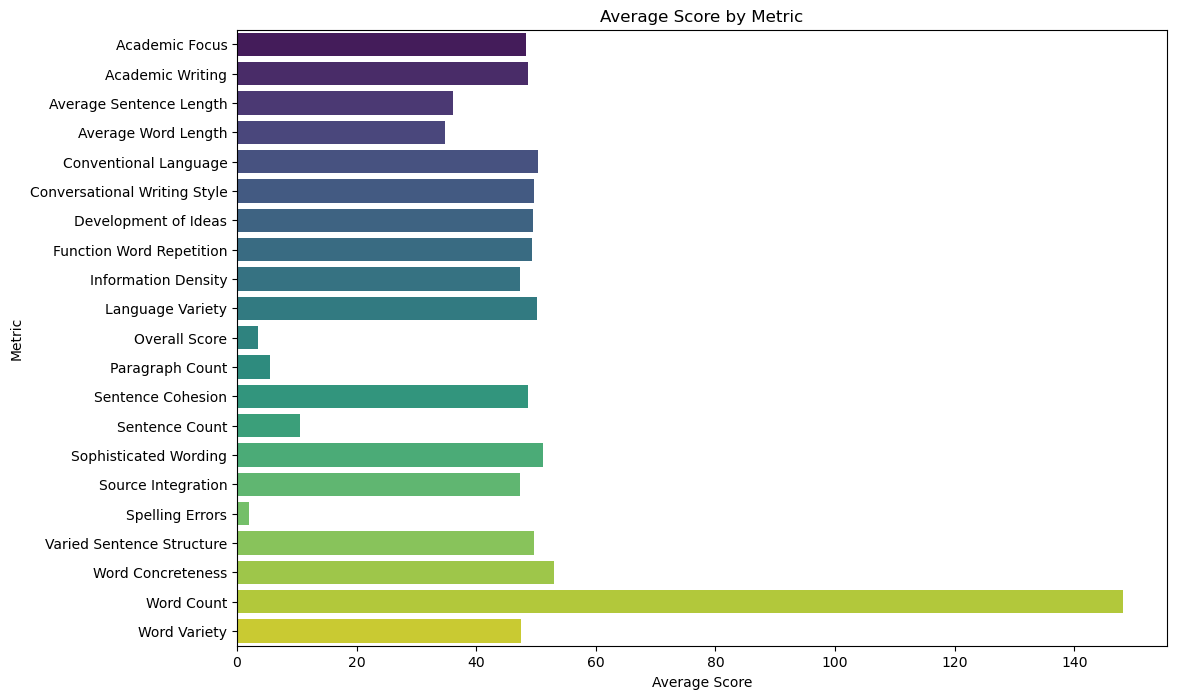

In [255]:
# Average Score by Metric
avg_score_by_metric = merged_essay_score_metric_df.groupby('name')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='name', data=avg_score_by_metric, palette='viridis')
plt.title('Average Score by Metric')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()


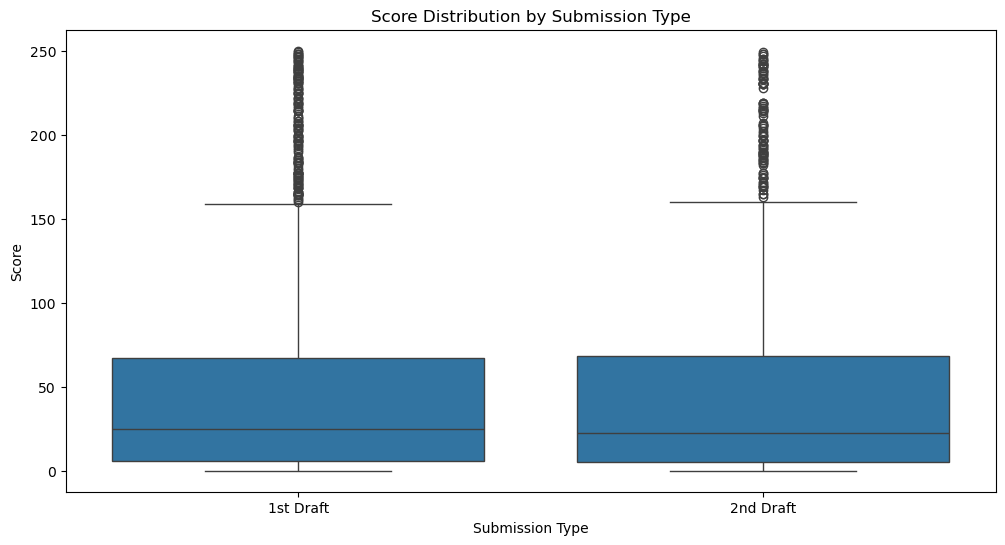

In [256]:
# Score Distribution by Submission Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='submission_type', y='score', data=merged_essay_score_df)
plt.title('Score Distribution by Submission Type')
plt.xlabel('Submission Type')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/3104304553.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




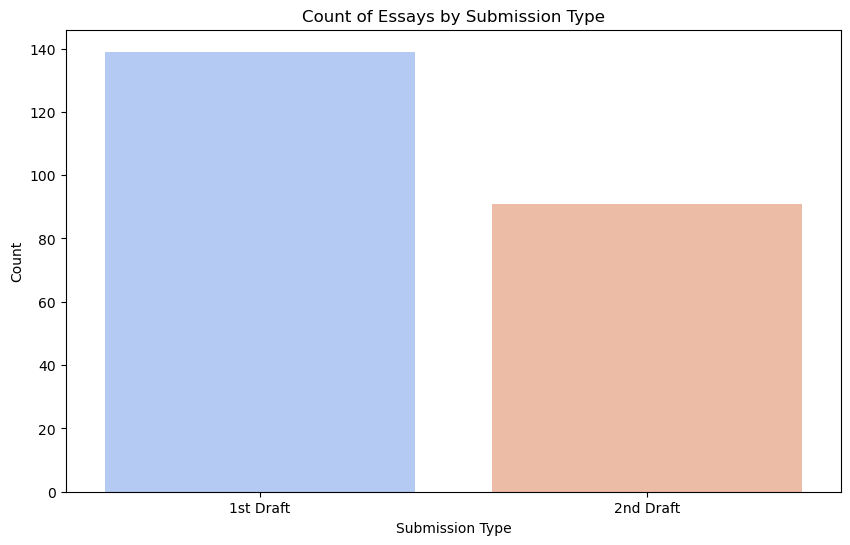

In [257]:
# Count of Essays by Submission Type
submission_counts = essay_df['submission_type'].value_counts().reset_index()
submission_counts.columns = ['submission_type', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='submission_type', y='count', data=submission_counts, palette='coolwarm')
plt.title('Count of Essays by Submission Type')
plt.xlabel('Submission Type')
plt.ylabel('Count')
plt.show()


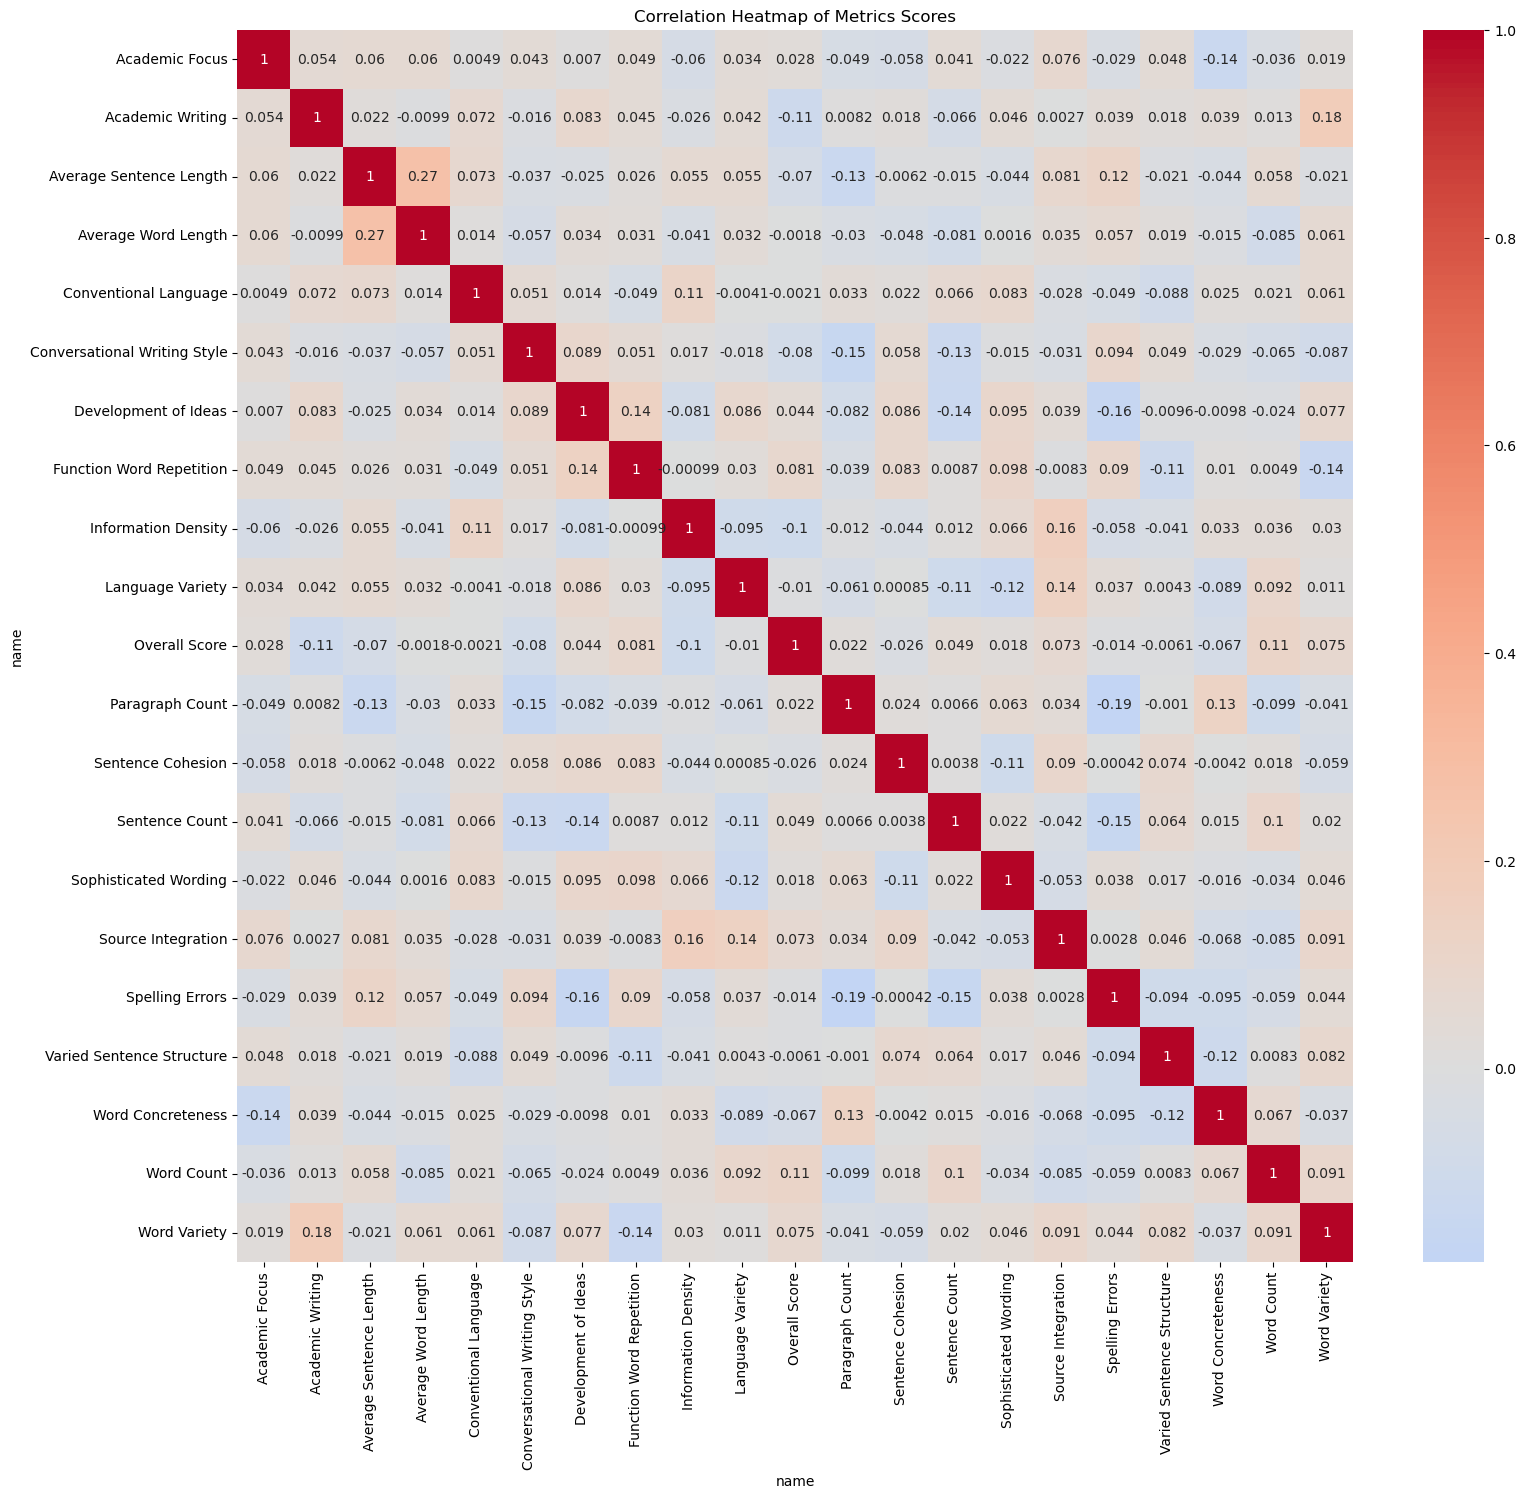

In [258]:
# Pivot to create a matrix of scores with metrics as columns
score_matrix = merged_essay_score_metric_df.pivot_table(index='essay_id', columns='name', values='score')

# Correlation Heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(score_matrix.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Metrics Scores')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/4254161535.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




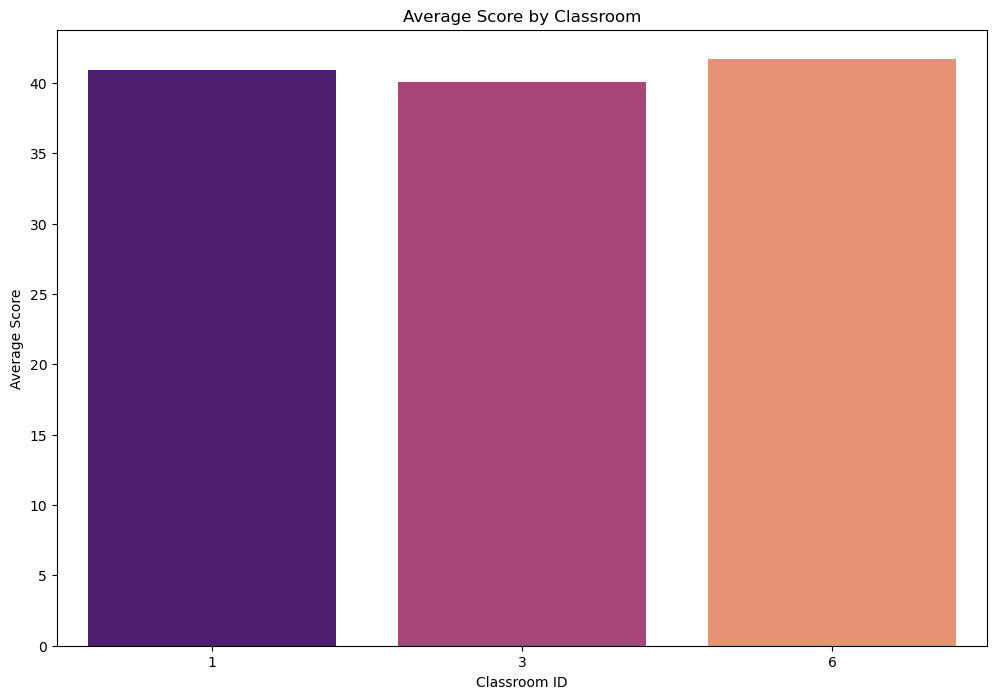

In [260]:
# Average Score by Classroom
avg_score_by_classroom = merged_essay_score_df.groupby('classroom_id')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='classroom_id', y='score', data=avg_score_by_classroom, palette='magma')
plt.title('Average Score by Classroom')
plt.xlabel('Classroom ID')
plt.ylabel('Average Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/2934744299.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



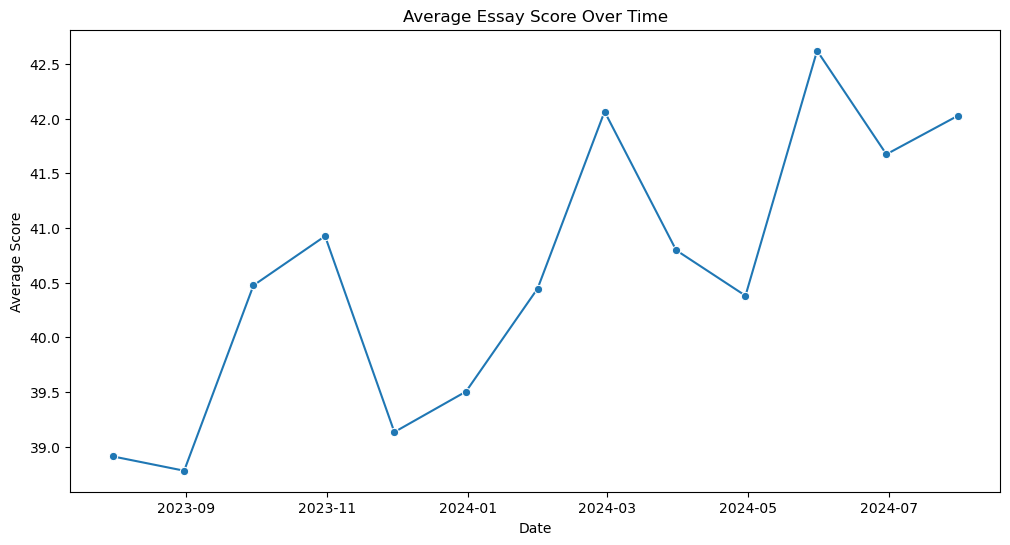

In [261]:
# Convert submitted_on to datetime
merged_essay_score_df['submitted_on'] = pd.to_datetime(merged_essay_score_df['submitted_on'])

# Average Score Over Time
avg_score_over_time = merged_essay_score_df.set_index('submitted_on').resample('M')['score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='submitted_on', y='score', data=avg_score_over_time, marker='o')
plt.title('Average Essay Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/2833041484.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




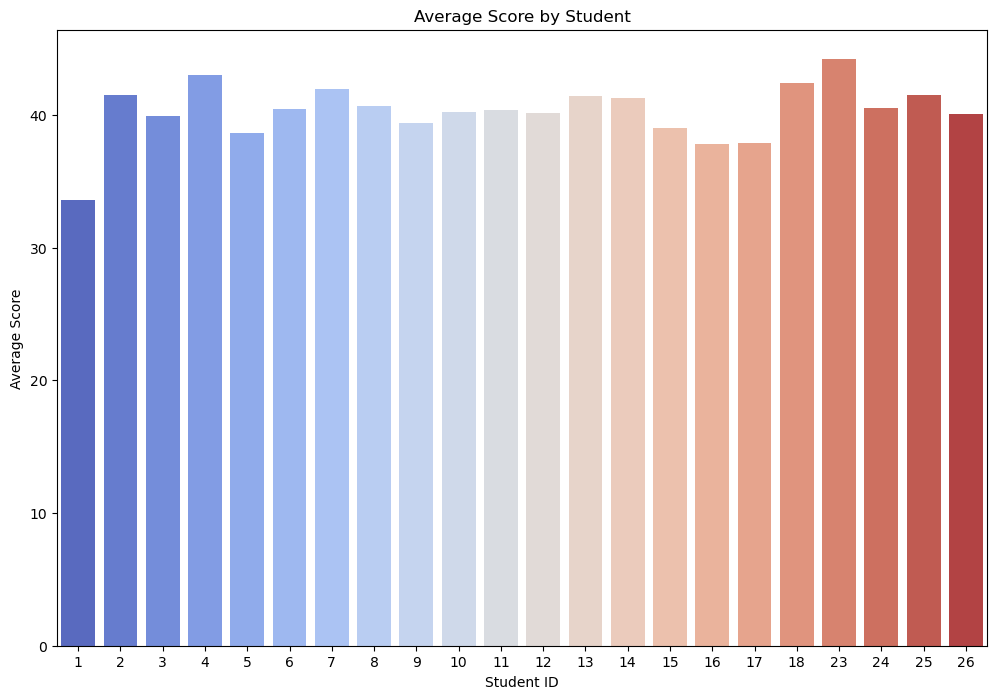

In [263]:
# Average Score by Student
avg_score_by_student = merged_essay_score_df.groupby('student_id')['score'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='student_id', y='score', data=avg_score_by_student.sort_values('score', ascending=False), palette='coolwarm')
plt.title('Average Score by Student')
plt.xlabel('Student ID')
plt.ylabel('Average Score')
plt.show()


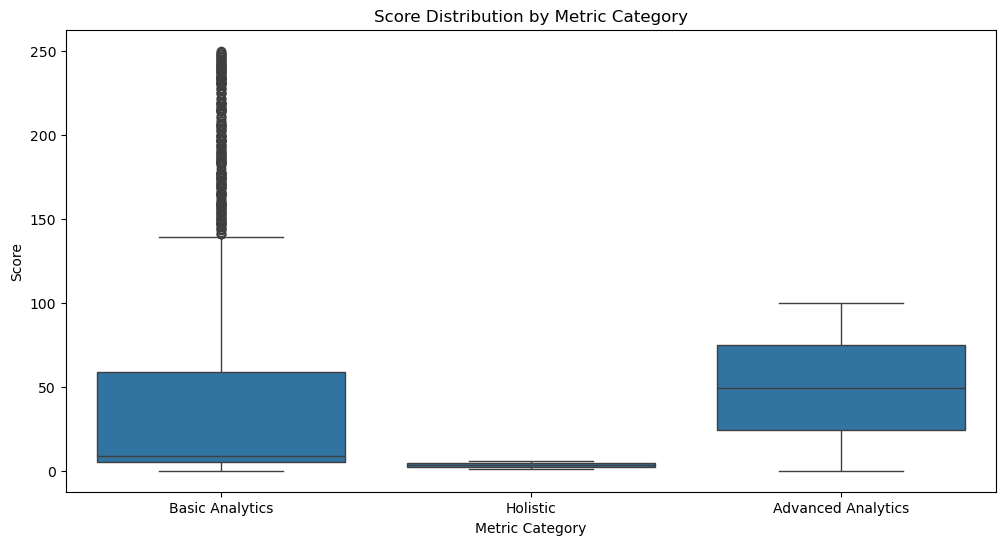

In [264]:
# Merge with metriccategory_df to get category information
merged_with_category_df = pd.merge(merged_essay_score_metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'))

# Score Distribution by Metric Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='name_category', y='score', data=merged_with_category_df)
plt.title('Score Distribution by Metric Category')
plt.xlabel('Metric Category')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/2384192985.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




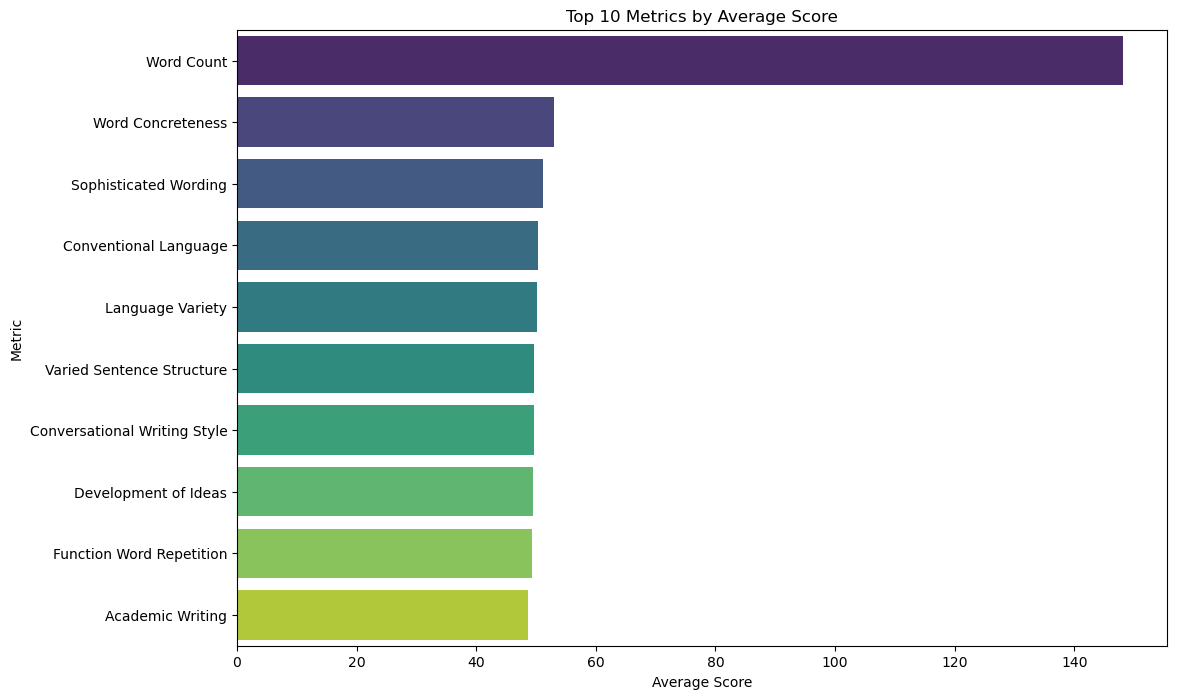

In [265]:
# Top 10 Metrics by Average Score
top_metrics = avg_score_by_metric.nlargest(10, 'score')

plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='name', data=top_metrics, palette='viridis')
plt.title('Top 10 Metrics by Average Score')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()


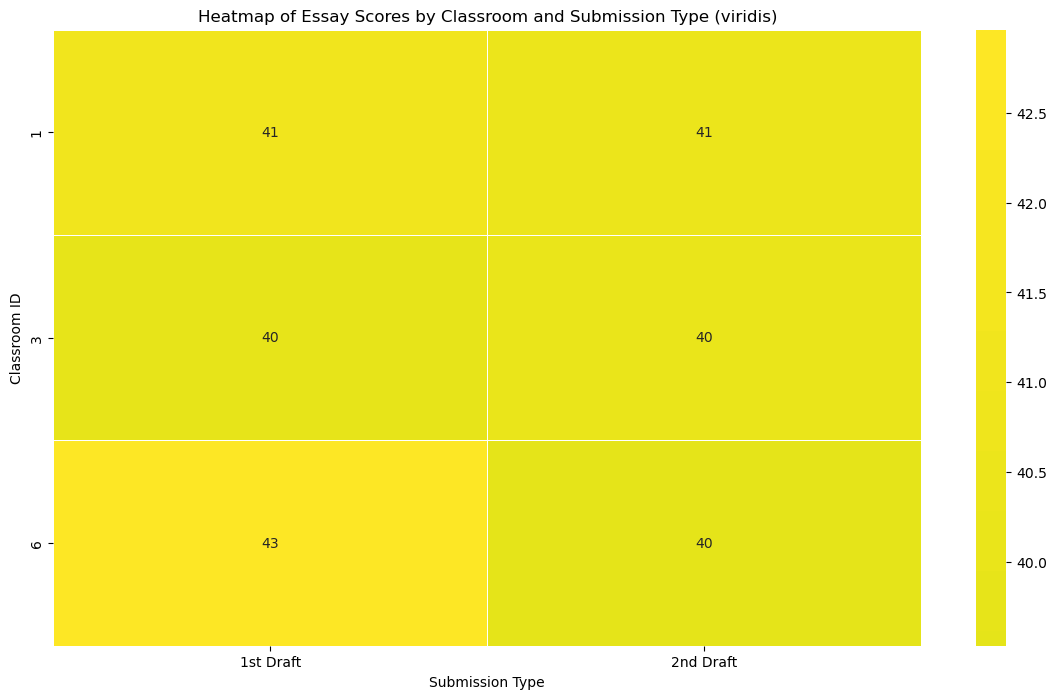

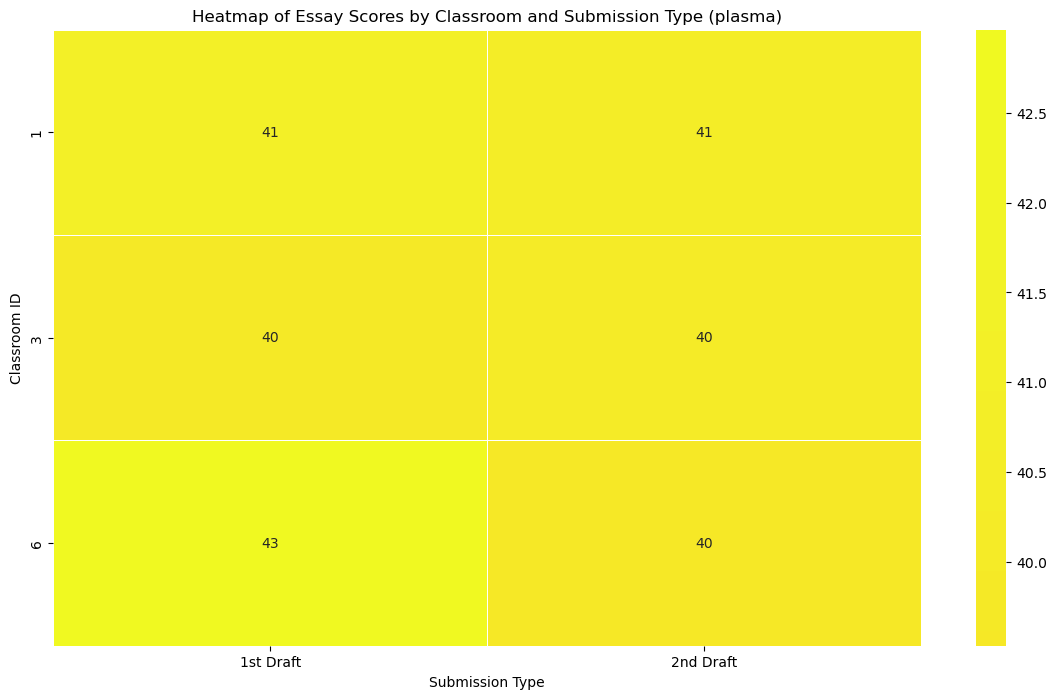

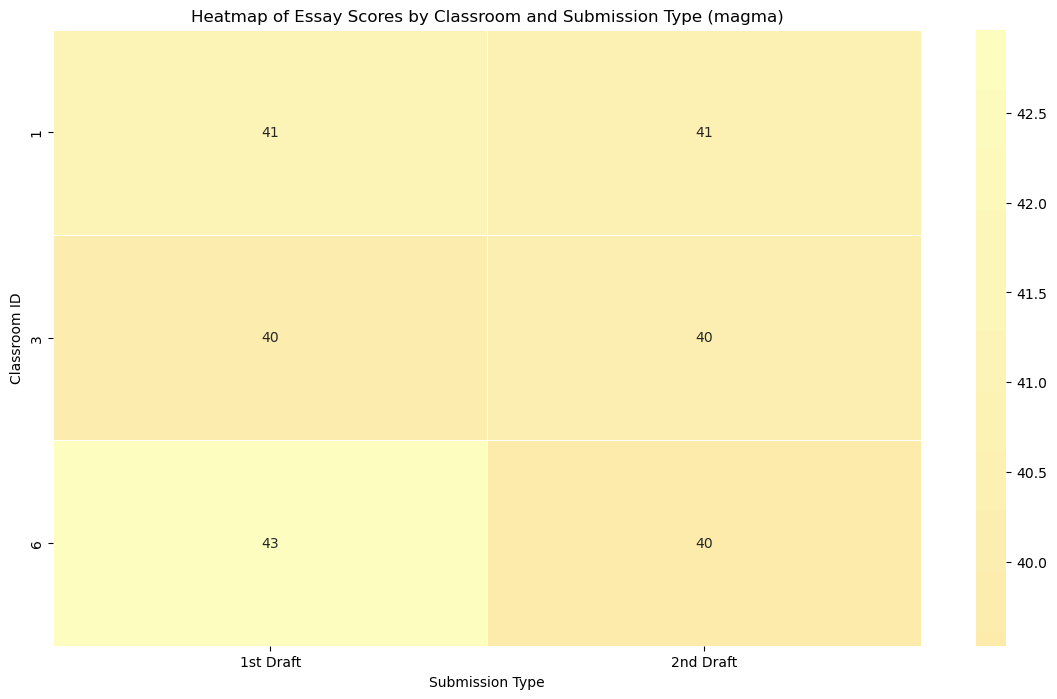

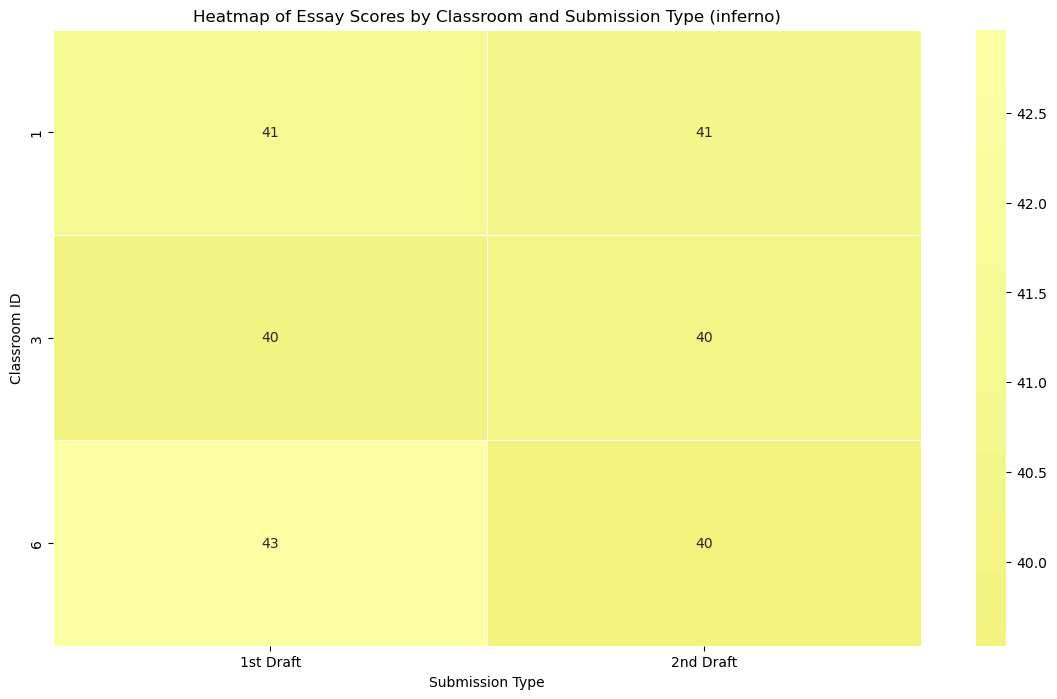

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume merged_essay_score_df is already available and merged

# Pivot to create a matrix of average scores with classrooms and submission types
heatmap_data = merged_essay_score_df.pivot_table(index='classroom_id', columns='submission_type', values='score', aggfunc='mean')

# Heatmap of Essay Scores by Classroom and Submission Type with different colormaps
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (viridis)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='plasma', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (plasma)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='magma', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (magma)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='inferno', center=0, linewidths=.5, linecolor='white')
plt.title('Heatmap of Essay Scores by Classroom and Submission Type (inferno)')
plt.xlabel('Submission Type')
plt.ylabel('Classroom ID')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/3062163445.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



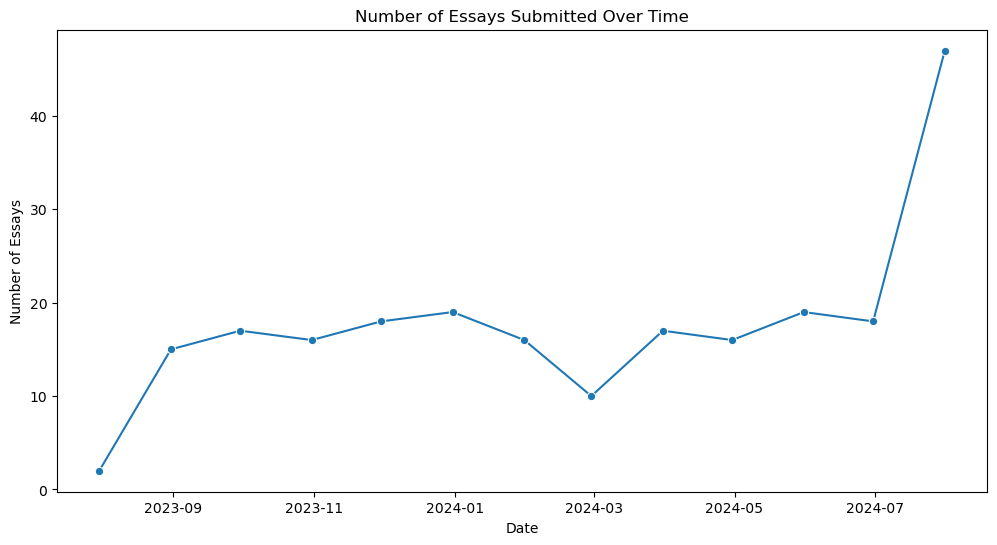

In [267]:


# Convert 'submitted_on' to datetime
essay_df['submitted_on'] = pd.to_datetime(essay_df['submitted_on'])

# Number of Essays Submitted Over Time
essays_over_time = essay_df.set_index('submitted_on').resample('M')['id'].count().reset_index()
essays_over_time.columns = ['submitted_on', 'count']

plt.figure(figsize=(12, 6))
sns.lineplot(x='submitted_on', y='count', data=essays_over_time, marker='o')
plt.title('Number of Essays Submitted Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Essays')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/2661200526.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




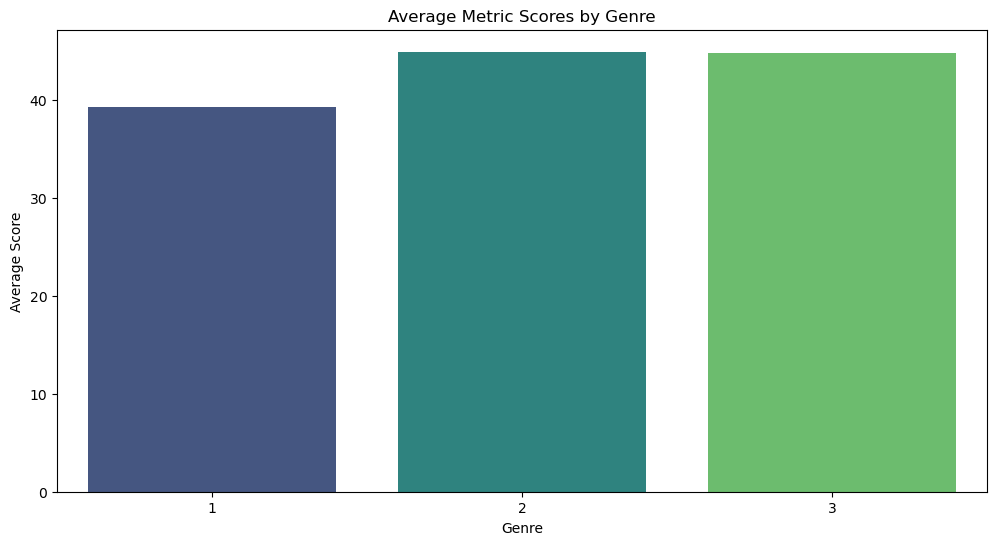

In [269]:
# Average Metric Scores by Genre
avg_score_by_genre = merged_essay_score_metric_df.groupby('genre')['score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='score', data=avg_score_by_genre, palette='viridis')
plt.title('Average Metric Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()


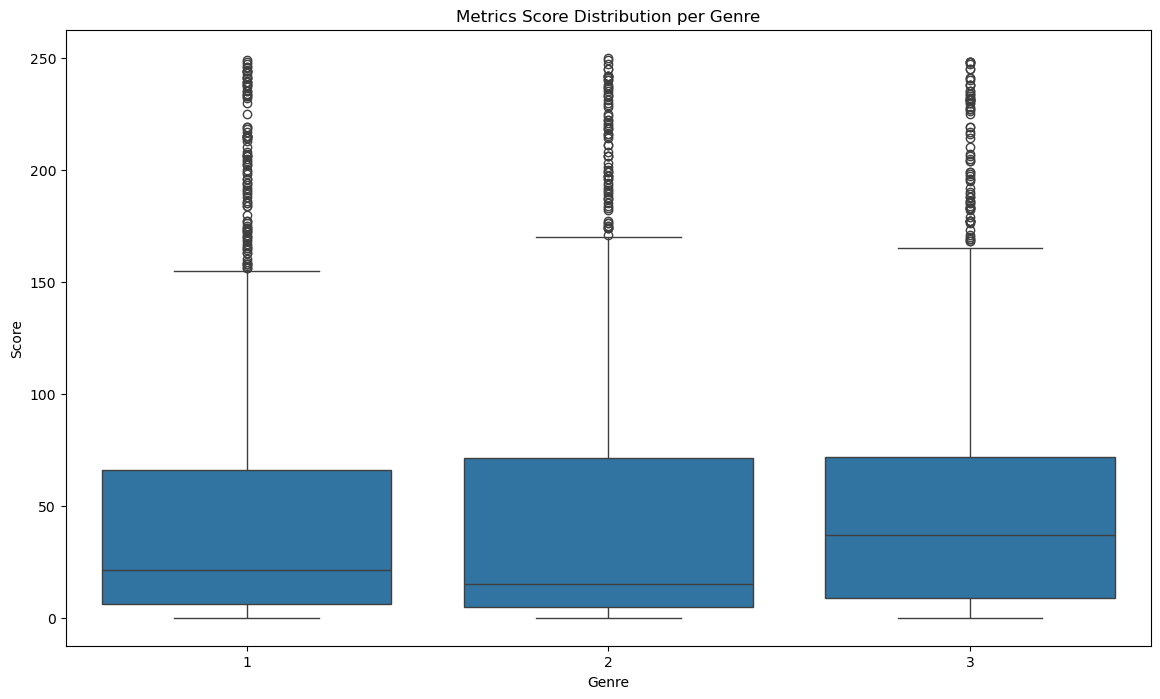

In [271]:
# Metrics Score Distribution per Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='score', data=merged_essay_score_metric_df)
plt.title('Metrics Score Distribution per Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/1906350587.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



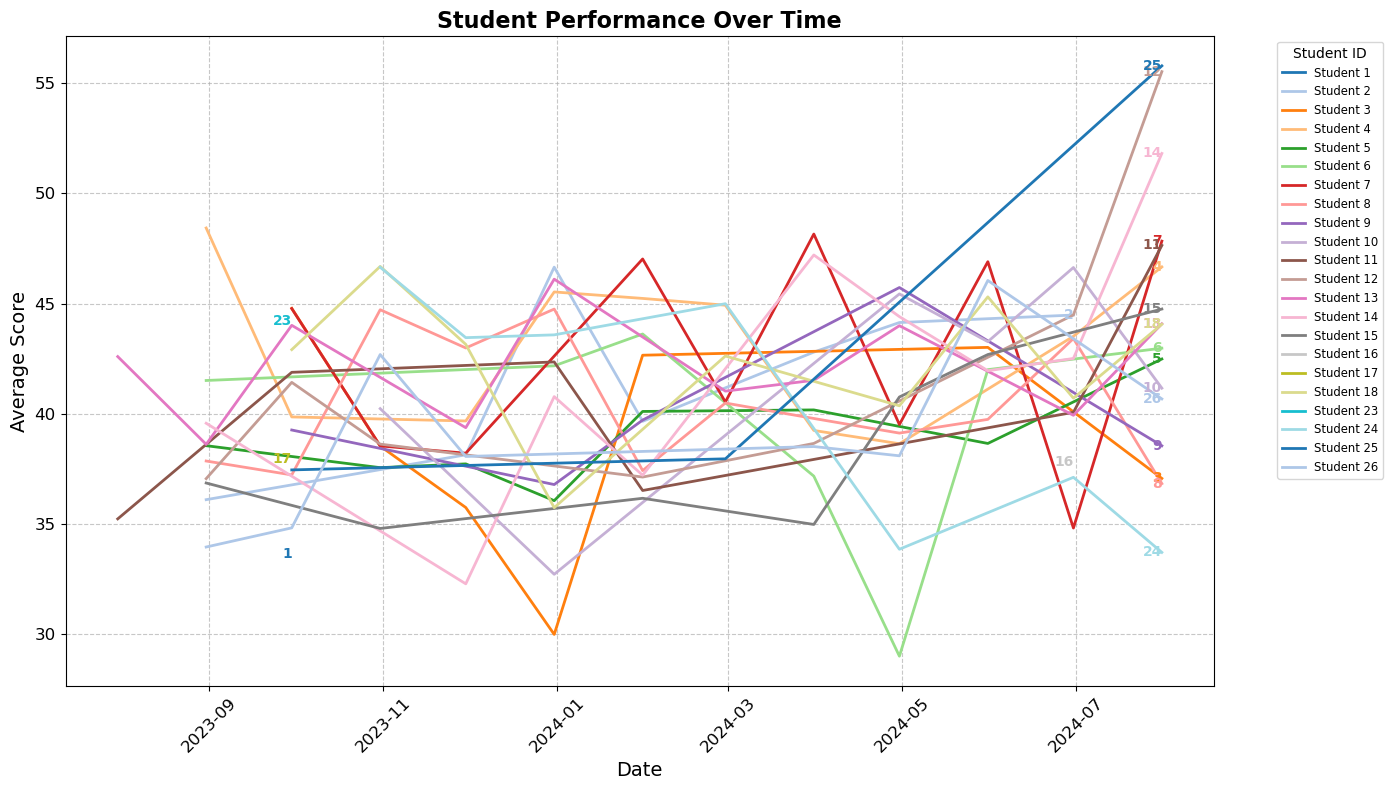

In [272]:
# Convert 'submitted_on' to datetime if not already converted
merged_essay_score_df['submitted_on'] = pd.to_datetime(merged_essay_score_df['submitted_on'])

# Group by student and resample monthly to get average score
student_performance = merged_essay_score_df.set_index('submitted_on').groupby(['student_id', pd.Grouper(freq='M')])['score'].mean().reset_index()
student_performance.columns = ['student_id', 'submitted_on', 'average_score']

# Define a color palette
unique_students = student_performance['student_id'].unique()
palette = sns.color_palette("tab20", n_colors=len(unique_students))  # Use a large, distinct palette

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each student separately to assign different colors
for i, student_id in enumerate(unique_students):
    student_data = student_performance[student_performance['student_id'] == student_id]
    sns.lineplot(
        x='submitted_on', 
        y='average_score', 
        data=student_data, 
        label=f'Student {student_id}', 
        color=palette[i], 
        linewidth=2
    )
    
    # Add text annotations at the end of each line
    last_entry = student_data.iloc[-1]
    plt.text(
        x=last_entry['submitted_on'], 
        y=last_entry['average_score'], 
        s=f'{student_id}', 
        color=palette[i], 
        ha='right', 
        va='center', 
        fontsize=10, 
        fontweight='bold'
    )

# Enhance the plot
plt.title('Student Performance Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Student ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save or show the plot
plt.savefig('student_performance_over_time_numbers.png', bbox_inches='tight')  # Save plot as an image file
plt.show()

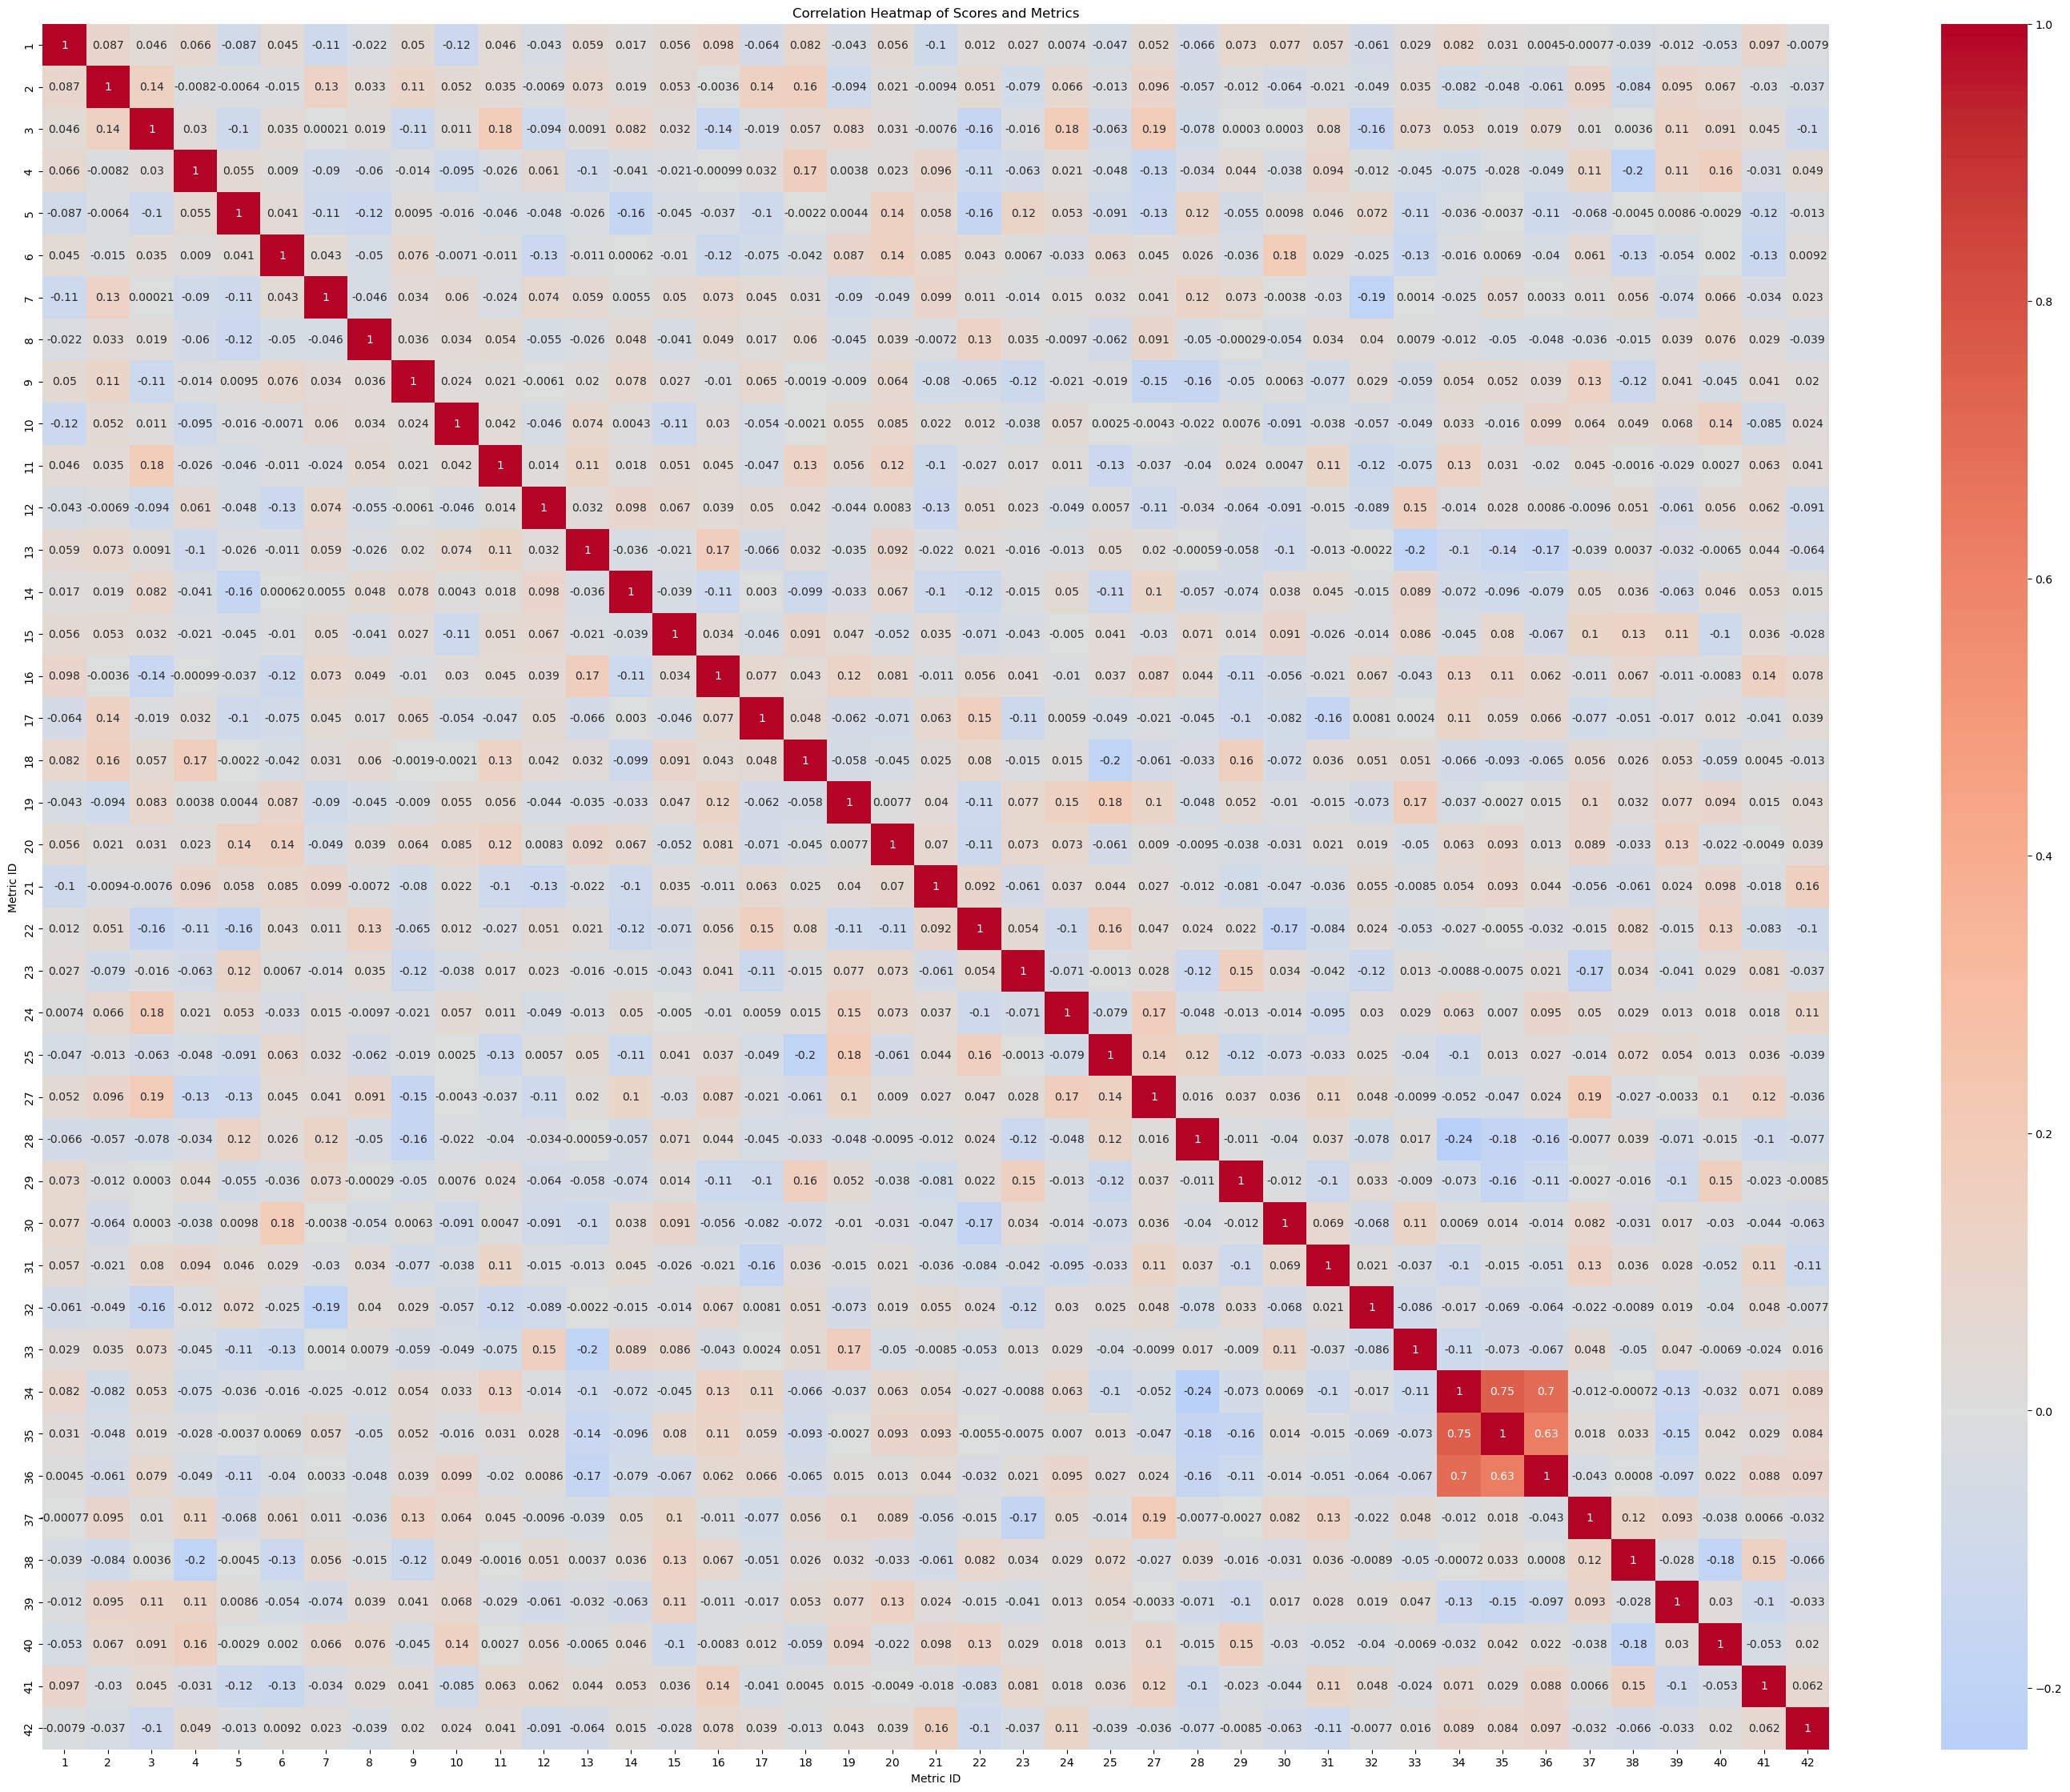

In [273]:
metrics_pivot = merged_essay_score_df.pivot_table(index='essay_id', columns='metric_id', values='score')
correlation_matrix = metrics_pivot.corr()

plt.figure(figsize=(36, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Scores and Metrics')
plt.xlabel('Metric ID')
plt.ylabel('Metric ID')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/4204443125.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




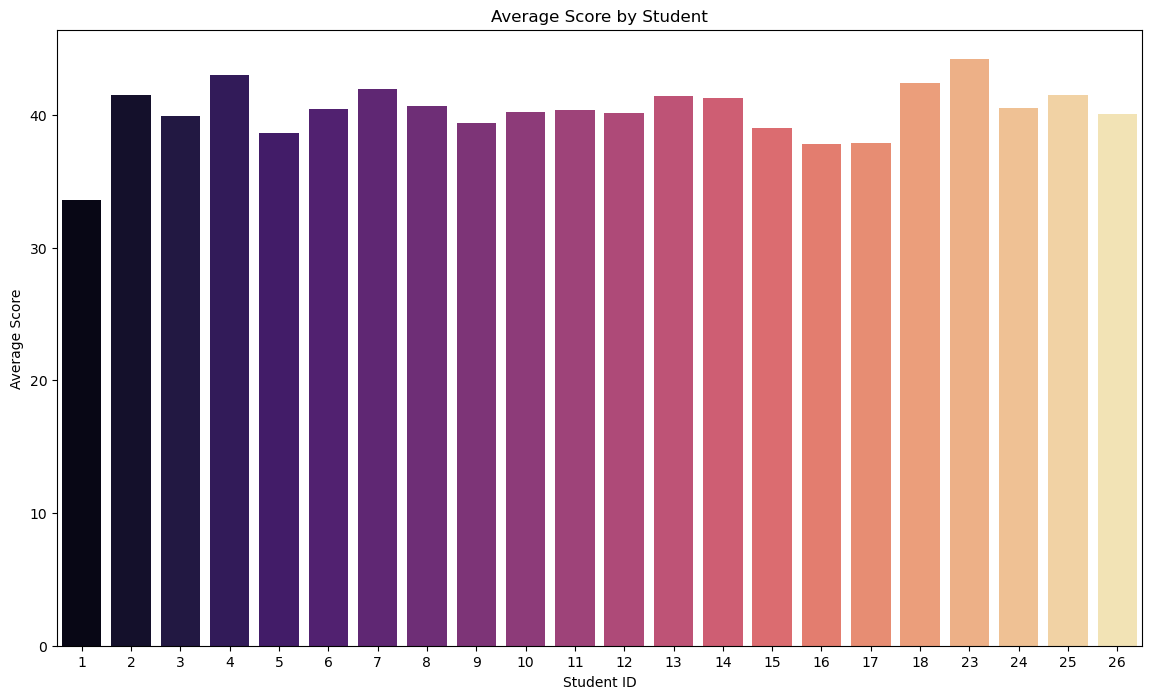

In [274]:
student_score_avg = merged_essay_score_df.groupby('student_id')['score'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='student_id', y='score', data=student_score_avg, palette='magma')
plt.title('Average Score by Student')
plt.xlabel('Student ID')
plt.ylabel('Average Score')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/253436912.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




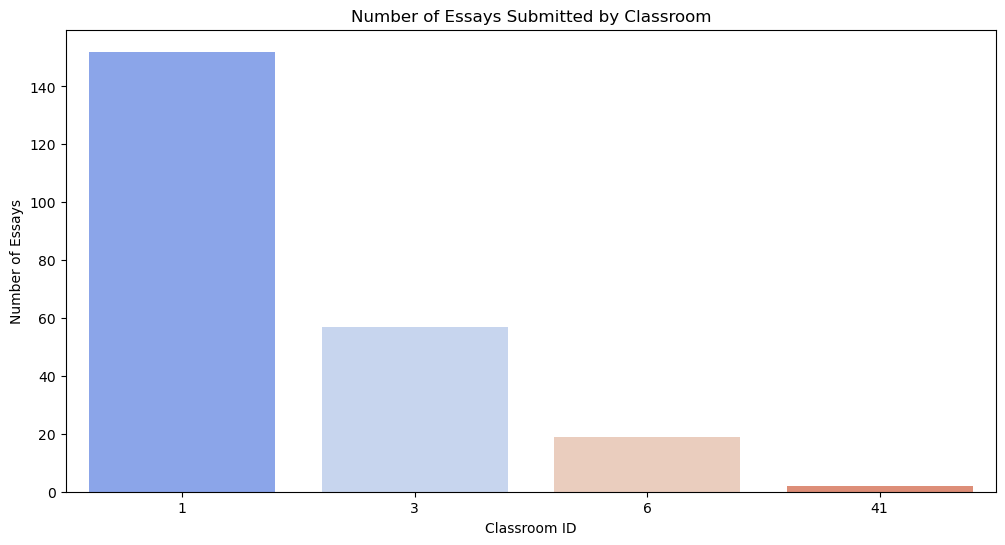

In [275]:
classroom_submission_counts = essay_df['classroom_id'].value_counts().reset_index()
classroom_submission_counts.columns = ['classroom_id', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='classroom_id', y='count', data=classroom_submission_counts, palette='coolwarm')
plt.title('Number of Essays Submitted by Classroom')
plt.xlabel('Classroom ID')
plt.ylabel('Number of Essays')
plt.show()

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/3171877494.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




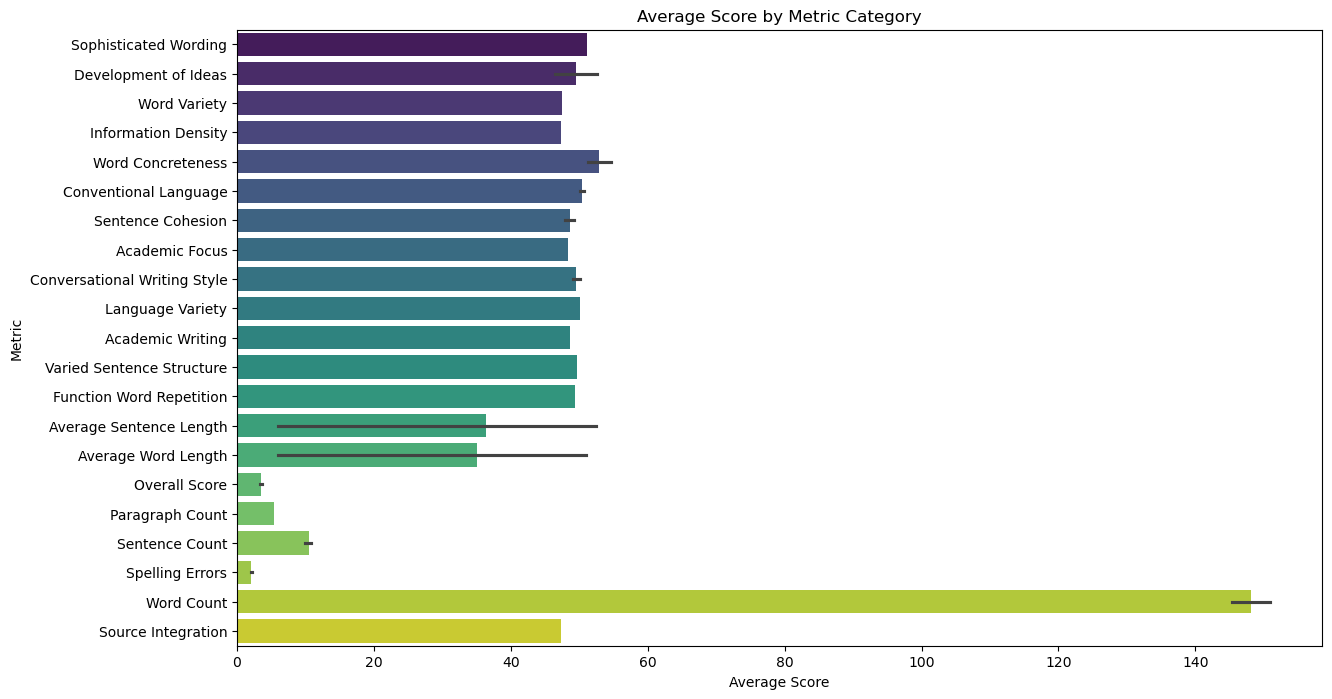

In [276]:
metric_score_avg = merged_essay_score_df.groupby('metric_id')['score'].mean().reset_index()
metric_score_avg = metric_score_avg.merge(metric_df[['id', 'name']], left_on='metric_id', right_on='id')

plt.figure(figsize=(14, 8))
sns.barplot(x='score', y='name', data=metric_score_avg, palette='viridis')
plt.title('Average Score by Metric Category')
plt.xlabel('Average Score')
plt.ylabel('Metric')
plt.show()

            Feature  Importance
10        metric_id    0.721745
8              id_y    0.113800
1             essay    0.054287
4        student_id    0.031942
5           task_id    0.020416
9          essay_id    0.016168
0              id_x    0.015157
7      classroom_id    0.006895
6       is_reviewed    0.006575
2   submission_type    0.006548
3             state    0.006467


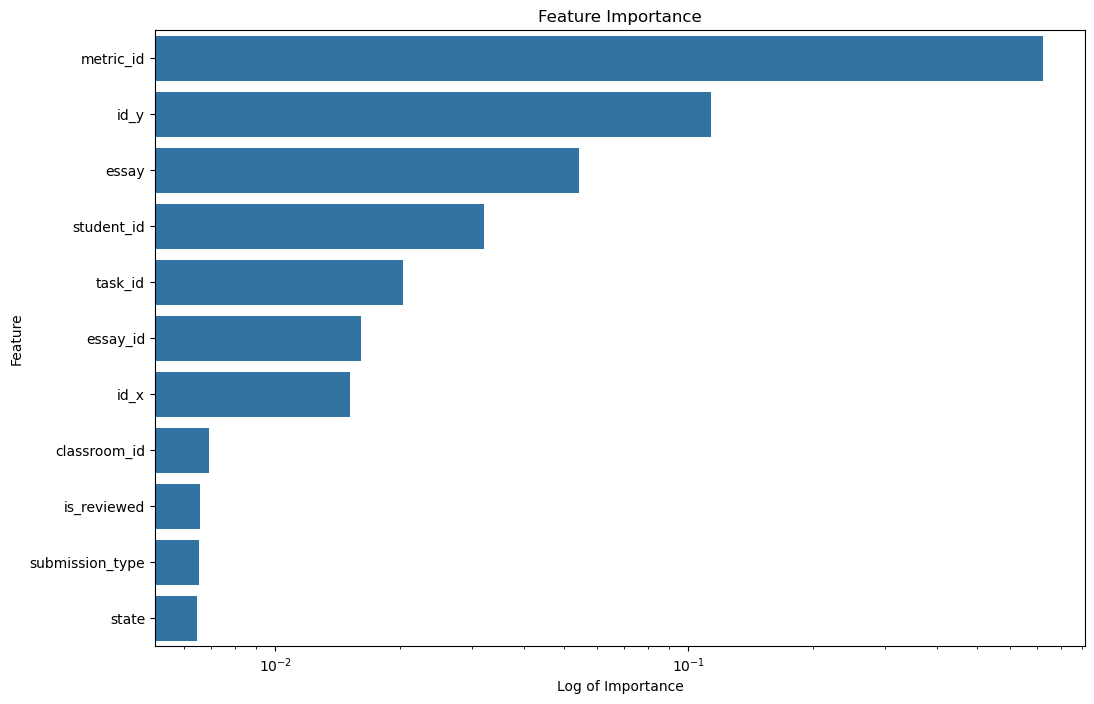

In [277]:
# Prepare the data for model
# We'll use merged_essay_score_df as the base dataframe for simplicity
features = merged_essay_score_df.drop(columns=['score', 'submitted_on', 'essay_html'])
target = merged_essay_score_df['score']

# Convert categorical features to numeric using LabelEncoder
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    features[column] = label_encoders[column].fit_transform(features[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xscale('log')
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0))
plt.xlabel('Log of Importance')
plt.ylabel('Feature')
plt.show()


In [278]:
essay_score_df.loc[essay_score_df['score'].idxmax()]

id           8974.0
score         250.0
essay_id      313.0
metric_id      38.0
Name: 8353, dtype: float64

In [280]:
filtered_df = essay_score_df[~essay_score_df['metric_id'].isin([41, 42])]


In [282]:
# Scores till and equal to 6
scores_le_6 = filtered_df[filtered_df['score'] <= 6]

# Scores greater than 6 and up to 250
scores_gt_6 = filtered_df[(filtered_df['score'] > 6) & (filtered_df['score'] <= 250)]


In [283]:
# Scores till and equal to 6
scores_le_6 = filtered_df[filtered_df['score'] <= 6]

# Scores greater than 6 and up to 250
scores_gt_6 = filtered_df[(filtered_df['score'] > 6) & (filtered_df['score'] <= 250)]


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/486602207.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/486602207.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




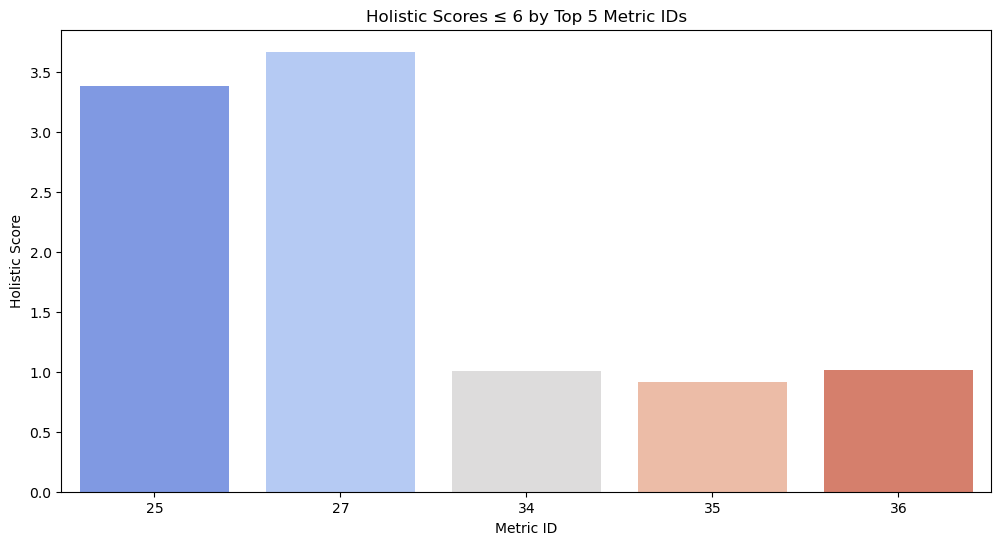

In [284]:
top_metric_ids_le_6 = scores_le_6['metric_id'].value_counts().nlargest(5).index
top_scores_le_6 = scores_le_6[scores_le_6['metric_id'].isin(top_metric_ids_le_6)]

plt.figure(figsize=(12, 6))
sns.barplot(x='metric_id', y='score', data=top_scores_le_6, palette='coolwarm', ci=None)
plt.title('Holistic Scores ≤ 6 by Top 5 Metric IDs')
plt.xlabel('Metric ID')
plt.ylabel('Holistic Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/1844797255.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/1844797255.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




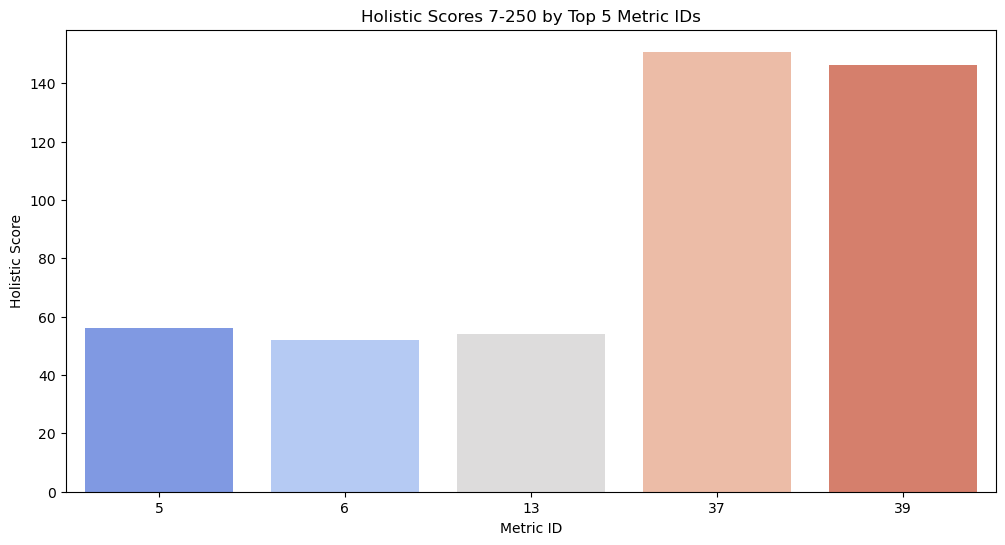

In [286]:
top_metric_ids_gt_6 = scores_gt_6['metric_id'].value_counts().nlargest(5).index
top_scores_gt_6 = scores_gt_6[scores_gt_6['metric_id'].isin(top_metric_ids_gt_6)]

plt.figure(figsize=(12, 6))
sns.barplot(x='metric_id', y='score', data=top_scores_gt_6, palette='coolwarm', ci=None)
plt.title('Holistic Scores 7-250 by Top 5 Metric IDs')
plt.xlabel('Metric ID')
plt.ylabel('Holistic Score')
plt.show()


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/21143739.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




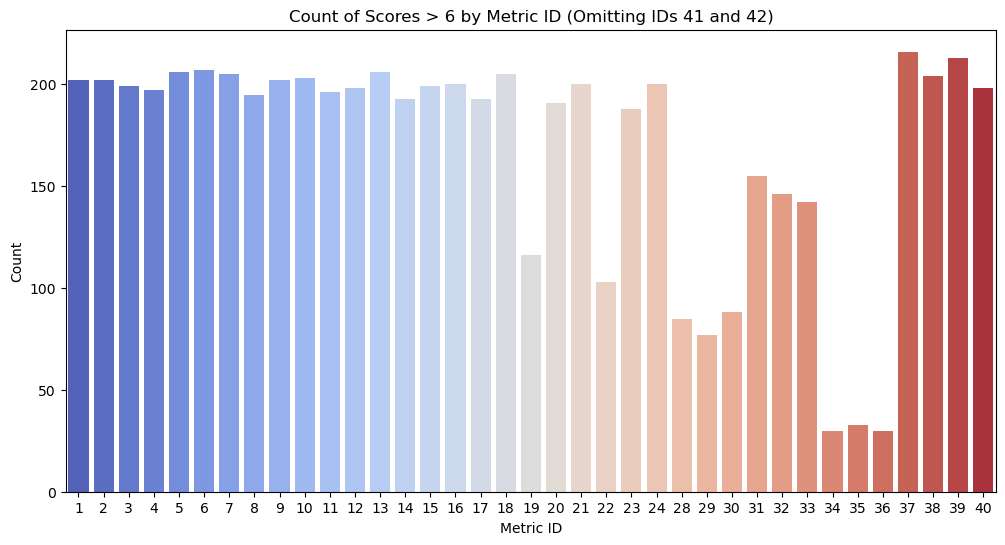

In [288]:
plt.figure(figsize=(12, 6))
sns.countplot(x='metric_id', data=scores_gt_6, palette='coolwarm')
plt.title('Count of Scores > 6 by Metric ID (Omitting IDs 41 and 42)')
plt.xlabel('Metric ID')
plt.ylabel('Count')
plt.show()


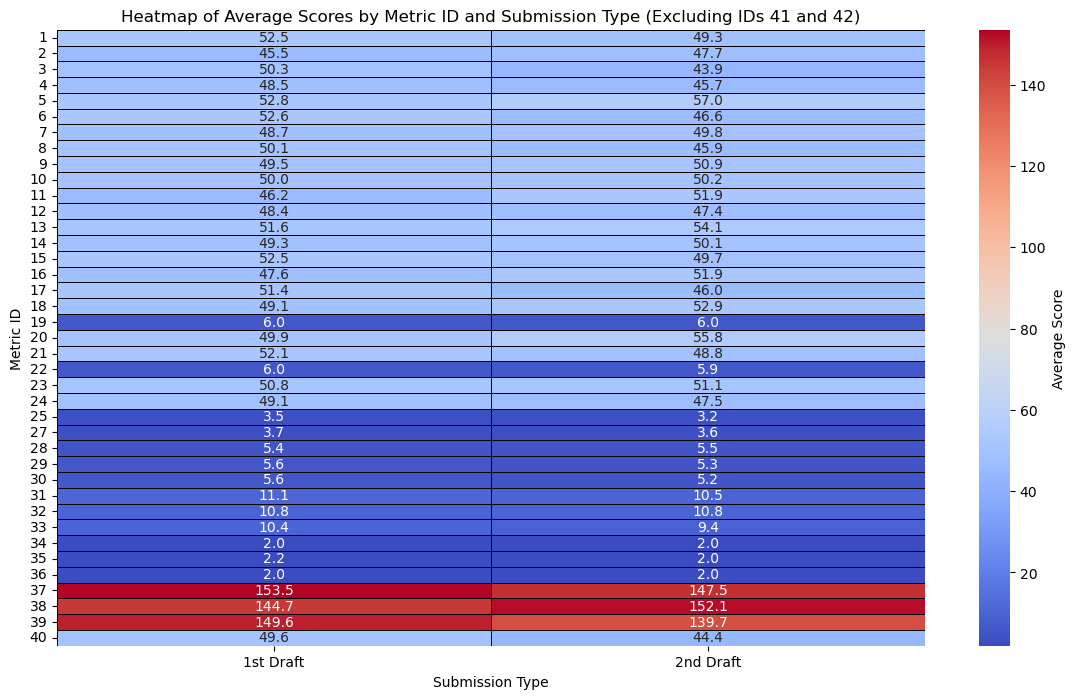

In [290]:
# Filter out the metric IDs 41 and 42
filtered_essay_score_df = merged_essay_score_df[~merged_essay_score_df['metric_id'].isin([41, 42])]

# Create a pivot table with Metric ID as rows, Submission Type as columns, and average score as values
heatmap_data = pd.pivot_table(
    filtered_essay_score_df,
    index='metric_id',               # Left axis: Metric ID
    columns='submission_type',       # Top axis: Submission Type
    values='score',                  # Right axis: Score
    aggfunc='mean'                   # Aggregate function: Mean score
).fillna(0)  # Replace NaN with 0 for better visualization


plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',                  # Color map
    annot=True,                       # Annotate cells with values
    fmt='.1f',                       # Format for annotations
    linewidths=0.5,                  # Line width between cells
    linecolor='black',               # Line color between cells
    cbar_kws={'label': 'Average Score'}  # Color bar label
)
plt.title('Heatmap of Average Scores by Metric ID and Submission Type (Excluding IDs 41 and 42)')
plt.xlabel('Submission Type')
plt.ylabel('Metric ID')
plt.show()


In [292]:
print(essay_df.columns)
print(metric_df.columns)
print(metriccategory_df.columns)
print(classroom_students_df.columns)
print(essay_score_df.columns)

Index(['id', 'essay', 'submission_type', 'state', 'submitted_on', 'student_id',
       'task_id', 'is_reviewed', 'essay_html', 'classroom_id'],
      dtype='object')
Index(['id', 'name', 'description', 'genre', 'category_id', 'index_value',
       'index_type', 'score_type', 'brief_description'],
      dtype='object')
Index(['id', 'name', 'type'], dtype='object')
Index(['classroom_id', 'user_id'], dtype='object')
Index(['id', 'score', 'essay_id', 'metric_id'], dtype='object')


In [293]:
# Perform an outer merge to include all rows from both DataFrames
merged_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'), how='outer')

# Check if there are any missing values in the resulting DataFrame
missing_data = merged_df.isnull().sum()

# Display all columns including the potentially missing one
correlated_columns = merged_df[['name_metric', 'name_category']]
print(correlated_columns)

# Optionally, print the missing data summary to see if any columns have missing values
print("Missing data in each column after merging:")
print(missing_data[missing_data > 0])

                     name_metric       name_category
0                  Overall Score            Holistic
1                  Overall Score            Holistic
2        Average Sentence Length     Basic Analytics
3        Average Sentence Length     Basic Analytics
4        Average Sentence Length     Basic Analytics
5            Average Word Length     Basic Analytics
6            Average Word Length     Basic Analytics
7            Average Word Length     Basic Analytics
8                Paragraph Count     Basic Analytics
9                Paragraph Count     Basic Analytics
10               Paragraph Count     Basic Analytics
11                Sentence Count     Basic Analytics
12                Sentence Count     Basic Analytics
13                Sentence Count     Basic Analytics
14               Spelling Errors     Basic Analytics
15               Spelling Errors     Basic Analytics
16               Spelling Errors     Basic Analytics
17                    Word Count     Basic Ana

In [294]:
# Print the first 100 rows
print("Top 100 rows:")
print(merged_df.head(100))

# Print the last 100 rows
print("\nBottom 100 rows:")
print(merged_df.tail(100))

# Print 100 rows from the middle
middle_index = len(merged_df) // 2
print("\nMiddle 100 rows:")
print(merged_df.iloc[middle_index:middle_index + 100])


Top 100 rows:
    id_metric                   name_metric  \
0          25                 Overall Score   
1          27                 Overall Score   
2          19       Average Sentence Length   
3          20       Average Sentence Length   
4          21       Average Sentence Length   
5          22           Average Word Length   
6          23           Average Word Length   
7          24           Average Word Length   
8          28               Paragraph Count   
9          29               Paragraph Count   
10         30               Paragraph Count   
11         31                Sentence Count   
12         32                Sentence Count   
13         33                Sentence Count   
14         34               Spelling Errors   
15         35               Spelling Errors   
16         36               Spelling Errors   
17         37                    Word Count   
18         38                    Word Count   
19         39                    Word Count   

In [296]:
# Step 1: Merge metric_df with metriccategory_df to bring in 'name_category'
merged_metric_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'))

# Step 2: Merge the result with essay_score_df to bring in 'name' and 'name_category'
final_df = pd.merge(essay_score_df, merged_metric_df, left_on='metric_id', right_on='id_metric')

# Step 3: Select relevant columns (including 'name' and 'name_category')
final_df = final_df[['metric_id', 'name_metric', 'name_category', 'score', 'essay_id']]

# Display the first few rows of the final DataFrame
print(final_df.head(100))


    metric_id                   name_metric       name_category  score  \
0          28               Paragraph Count     Basic Analytics   3.00   
1          34               Spelling Errors     Basic Analytics   0.00   
2          25                 Overall Score            Holistic   3.68   
3          22           Average Word Length     Basic Analytics   5.95   
4          37                    Word Count     Basic Analytics  62.00   
..        ...                           ...                 ...    ...   
95         14     Varied Sentence Structure  Advanced Analytics  40.49   
96         15             Word Concreteness  Advanced Analytics  91.40   
97         16      Function Word Repetition  Advanced Analytics   7.06   
98         17  Conversational Writing Style  Advanced Analytics  34.15   
99         18         Conventional Language  Advanced Analytics  36.45   

    essay_id  
0         80  
1         80  
2         82  
3         82  
4         82  
..       ...  
95    

In [298]:
# Assuming final_df is the DataFrame you want to inspect

# Get the total number of rows
total_rows = len(final_df)

# Define the number of rows to display
n = 200

# Extract the top 200 rows
top_rows = final_df.head(n)

# Extract the bottom 200 rows
bottom_rows = final_df.tail(n)

# Extract the middle 200 rows
middle_start = total_rows // 2 - n // 2
middle_end = middle_start + n
middle_rows = final_df.iloc[middle_start:middle_end]

# Display the top, bottom, and middle rows
print("Top 200 Rows:")
print(top_rows)

print("\nMiddle 200 Rows:")
print(middle_rows)

print("\nBottom 200 Rows:")
print(bottom_rows)


Top 200 Rows:
     metric_id                   name_metric       name_category  score  \
0           28               Paragraph Count     Basic Analytics   3.00   
1           34               Spelling Errors     Basic Analytics   0.00   
2           25                 Overall Score            Holistic   3.68   
3           22           Average Word Length     Basic Analytics   5.95   
4           37                    Word Count     Basic Analytics  62.00   
..         ...                           ...                 ...    ...   
195          7             Sentence Cohesion  Advanced Analytics  52.81   
196          8                Academic Focus  Advanced Analytics   7.95   
197          9  Conversational Writing Style  Advanced Analytics  42.31   
198         27                 Overall Score            Holistic   3.15   
199         21       Average Sentence Length     Basic Analytics  67.19   

     essay_id  
0          80  
1          80  
2          82  
3          82  
4    

/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/3550735498.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




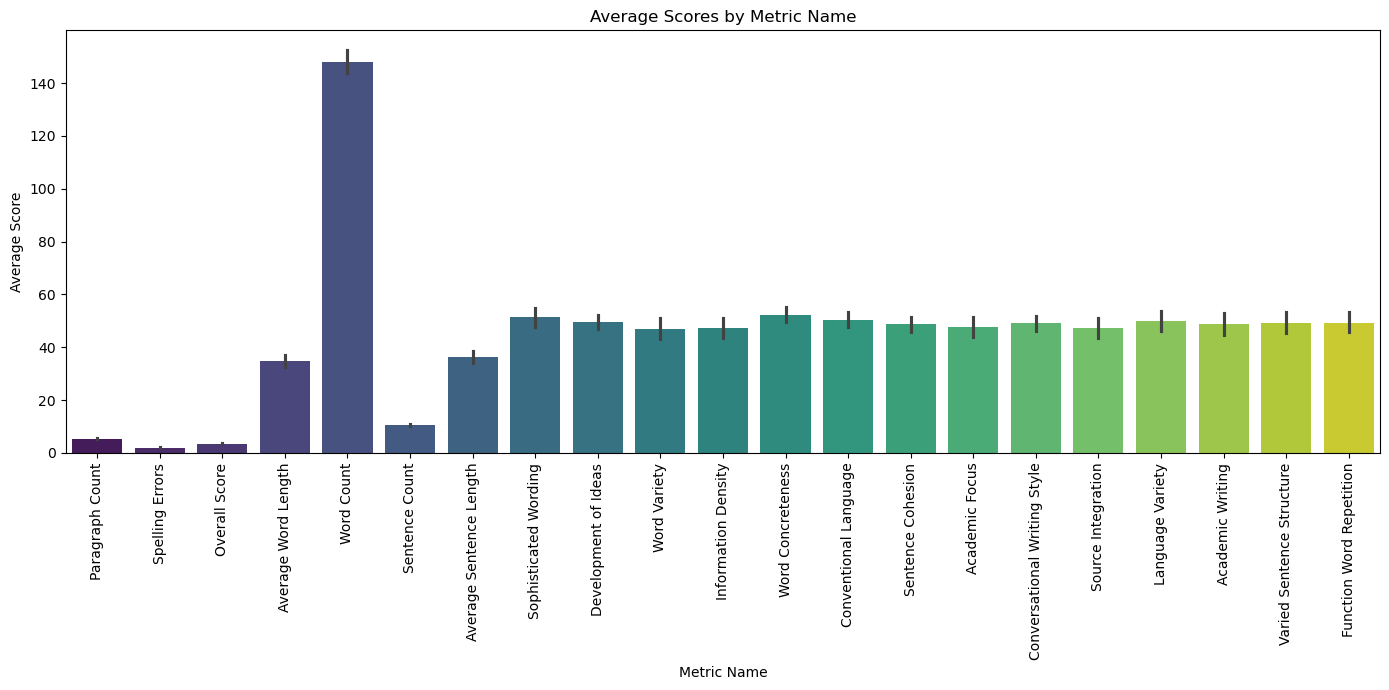

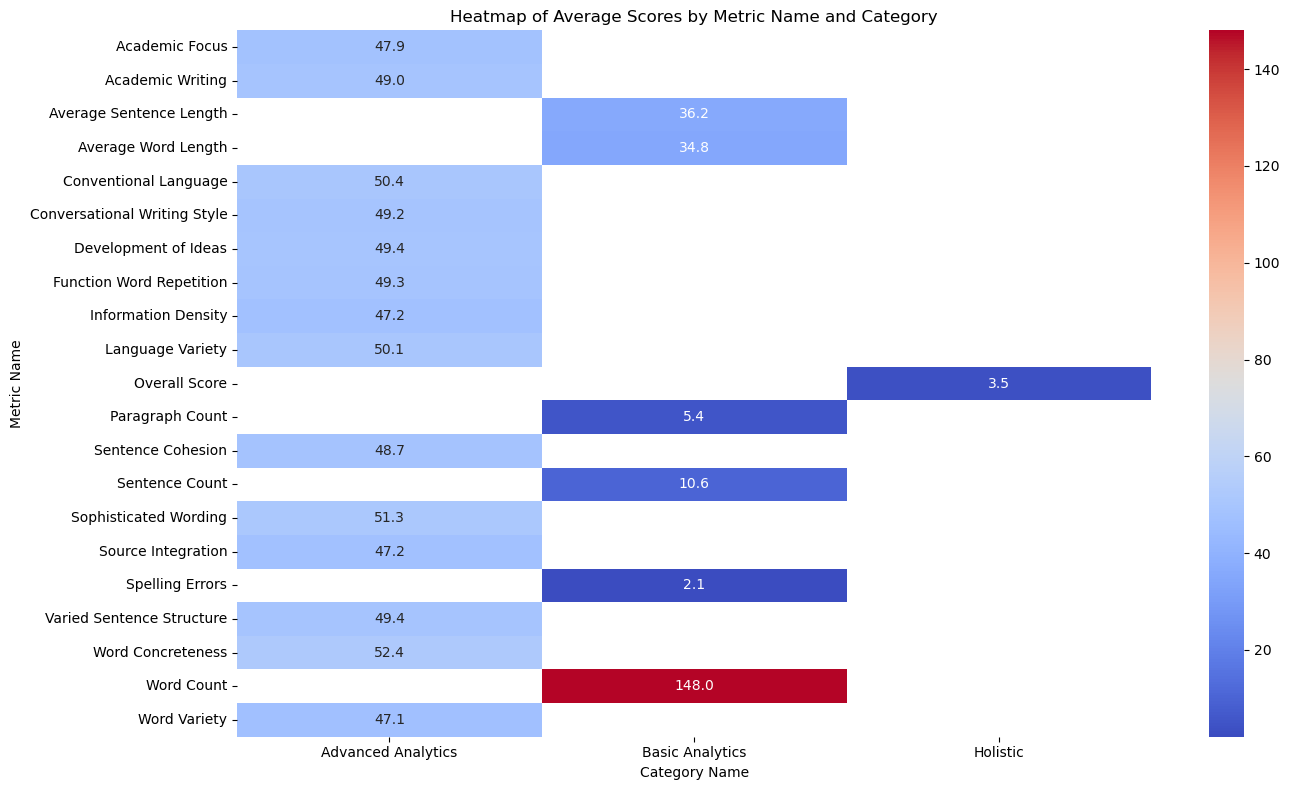

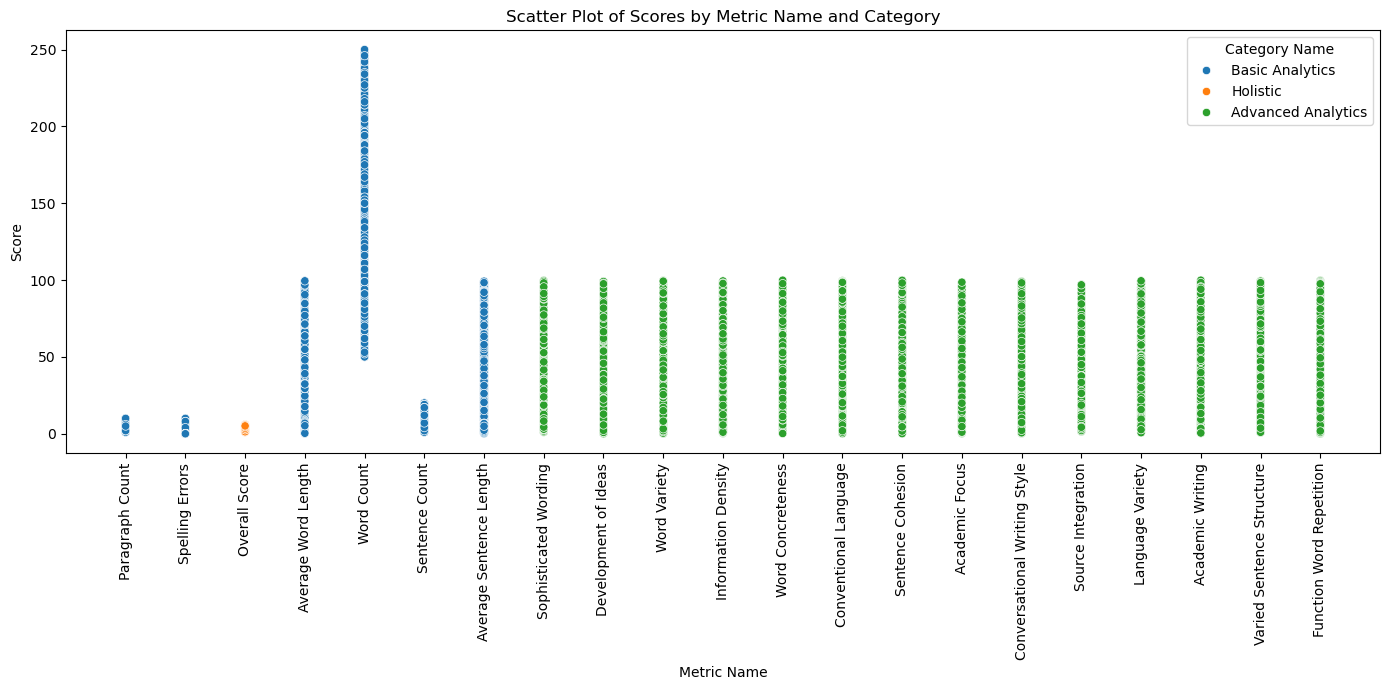

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_df is already created as per the provided steps

# Step 1: Merge metric_df with metriccategory_df to bring in 'name_category'
merged_metric_df = pd.merge(metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('_metric', '_category'))

# Step 2: Merge the result with essay_score_df to bring in 'name' and 'name_category'
final_df = pd.merge(essay_score_df, merged_metric_df, left_on='metric_id', right_on='id_metric')

# Step 3: Select relevant columns (including 'name' and 'name_category')
final_df = final_df[['metric_id', 'name_metric', 'name_category', 'score', 'essay_id']]

# Visualization 1: Bar Plot of Scores by Metric Name
plt.figure(figsize=(14, 7))
sns.barplot(x='name_metric', y='score', data=final_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Scores by Metric Name')
plt.xlabel('Metric Name')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

# Visualization 2: Heatmap of Scores by Metric Name and Category
pivot_table = final_df.pivot_table(values='score', index='name_metric', columns='name_category', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Heatmap of Average Scores by Metric Name and Category')
plt.xlabel('Category Name')
plt.ylabel('Metric Name')
plt.tight_layout()
plt.show()

# Visualization 3: Scatter Plot of Scores by Metric Name and Category
plt.figure(figsize=(14, 7))
sns.scatterplot(x='name_metric', y='score', hue='name_category', data=final_df, palette='tab10')
plt.xticks(rotation=90)
plt.title('Scatter Plot of Scores by Metric Name and Category')
plt.xlabel('Metric Name')
plt.ylabel('Score')
plt.legend(title='Category Name')
plt.tight_layout()
plt.show()


In [301]:
import pandas as pd

# Assuming final_df is the DataFrame created in the previous step

# Group by 'name_category' and filter categories with more than one entry
grouped = final_df.groupby('name_category').filter(lambda x: len(x) > 1)

# Print the unique 'name_category' values
unique_categories = grouped['name_category'].unique()
print("Unique Name Categories with Multiple Entries:")
print(unique_categories)

# Print details for each 'name_category'
for category in unique_categories:
    print(f"\nDetails for Category: {category}")
    print(grouped[grouped['name_category'] == category])


Unique Name Categories with Multiple Entries:
['Basic Analytics' 'Holistic' 'Advanced Analytics']

Details for Category: Basic Analytics
      metric_id          name_metric    name_category   score  essay_id
0            28      Paragraph Count  Basic Analytics    3.00        80
1            34      Spelling Errors  Basic Analytics    0.00        80
3            22  Average Word Length  Basic Analytics    5.95        82
4            37           Word Count  Basic Analytics   62.00        82
5            31       Sentence Count  Basic Analytics   19.00        82
...         ...                  ...              ...     ...       ...
8274         35      Spelling Errors  Basic Analytics    0.00       321
8275         36      Spelling Errors  Basic Analytics    0.00       321
8276         37           Word Count  Basic Analytics   99.00       321
8277         38           Word Count  Basic Analytics   62.00       321
8278         39           Word Count  Basic Analytics  134.00       321

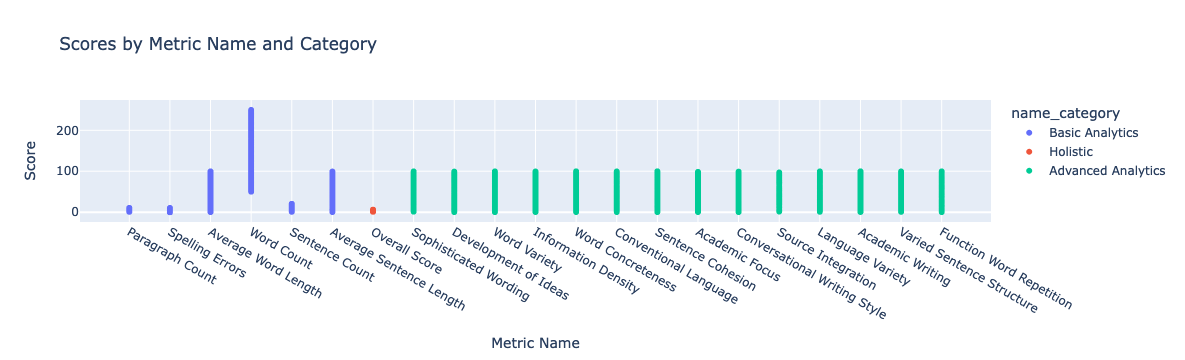

In [302]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(grouped, x='name_metric', y='score', color='name_category', 
                 title='Scores by Metric Name and Category',
                 labels={'name_metric': 'Metric Name', 'score': 'Score'},
                 hover_name='name_category', hover_data={'score': True, 'name_metric': True})

# Show the figure
fig.show()

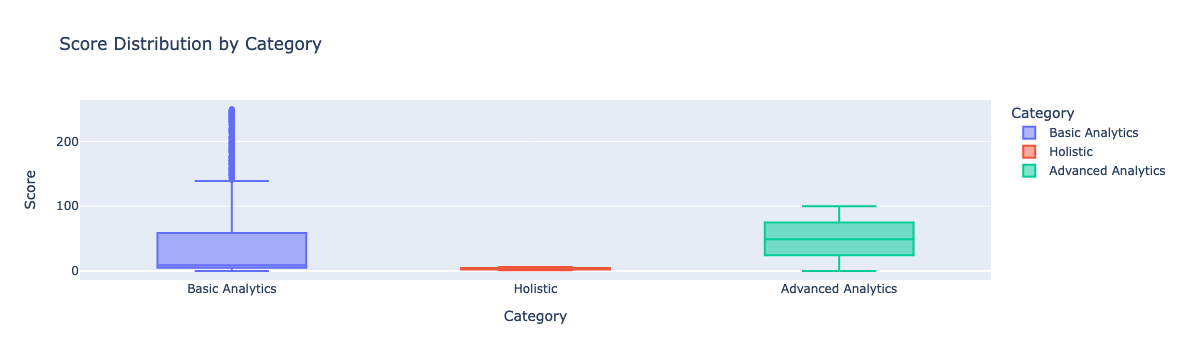

In [305]:
import plotly.express as px

# Create an interactive box plot
fig_box = px.box(grouped, x='name_category', y='score', color='name_category',
                 title='Score Distribution by Category',
                 labels={'name_category': 'Category', 'score': 'Score'})

# Show the figure
fig_box.show()


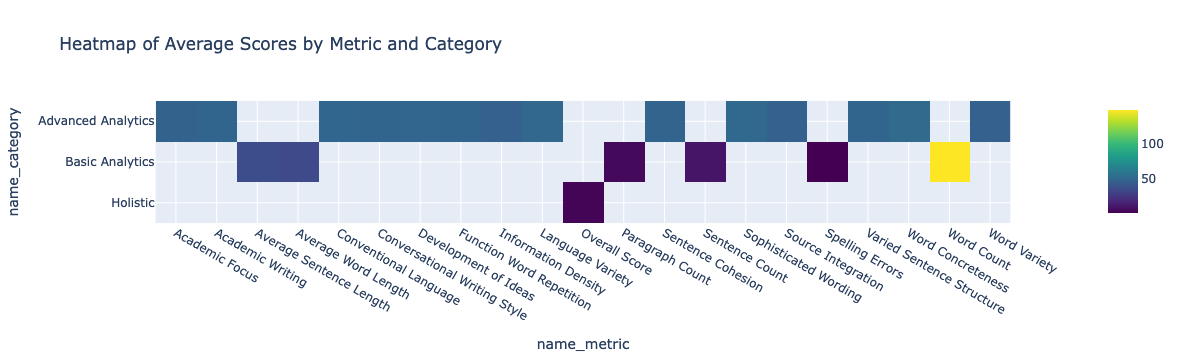

In [306]:
import plotly.express as px

# Create a heatmap
fig_heatmap = px.imshow(
    grouped.pivot_table(index='name_category', columns='name_metric', values='score', aggfunc='mean'),
    color_continuous_scale='Viridis',
    title='Heatmap of Average Scores by Metric and Category'
)

# Show the figure
fig_heatmap.show()


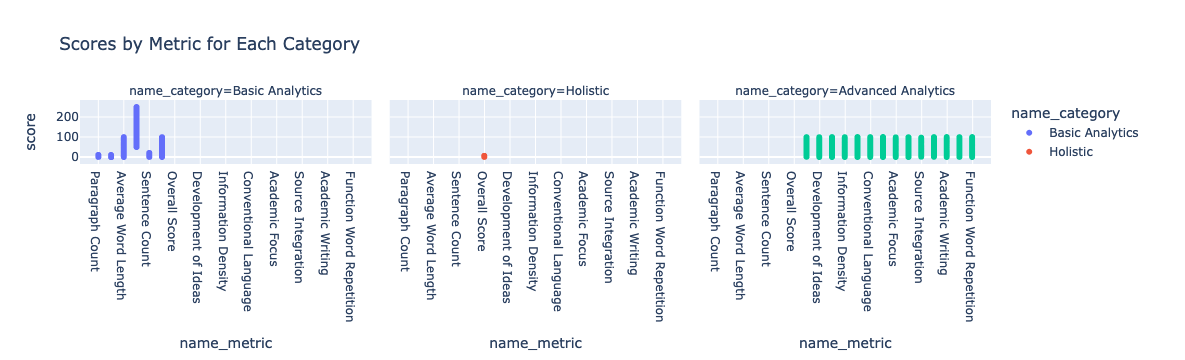

In [307]:
import plotly.express as px

# Create a facet grid
fig_facet = px.scatter(
    grouped, x='name_metric', y='score', color='name_category',
    facet_col='name_category', facet_col_wrap=3,  # Adjust facet_col_wrap for layout
    title='Scores by Metric for Each Category'
)

# Show the figure
fig_facet.show()


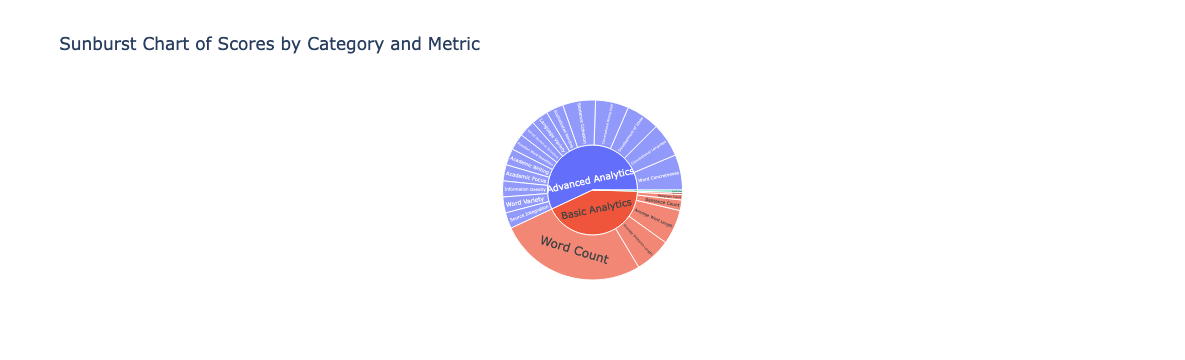

In [311]:
import plotly.express as px

# Create a sunburst chart
fig_sunburst = px.sunburst(
    grouped, path=['name_category', 'name_metric'], values='score',
    title='Sunburst Chart of Scores by Category and Metric'
)

# Show the figure
fig_sunburst.show()


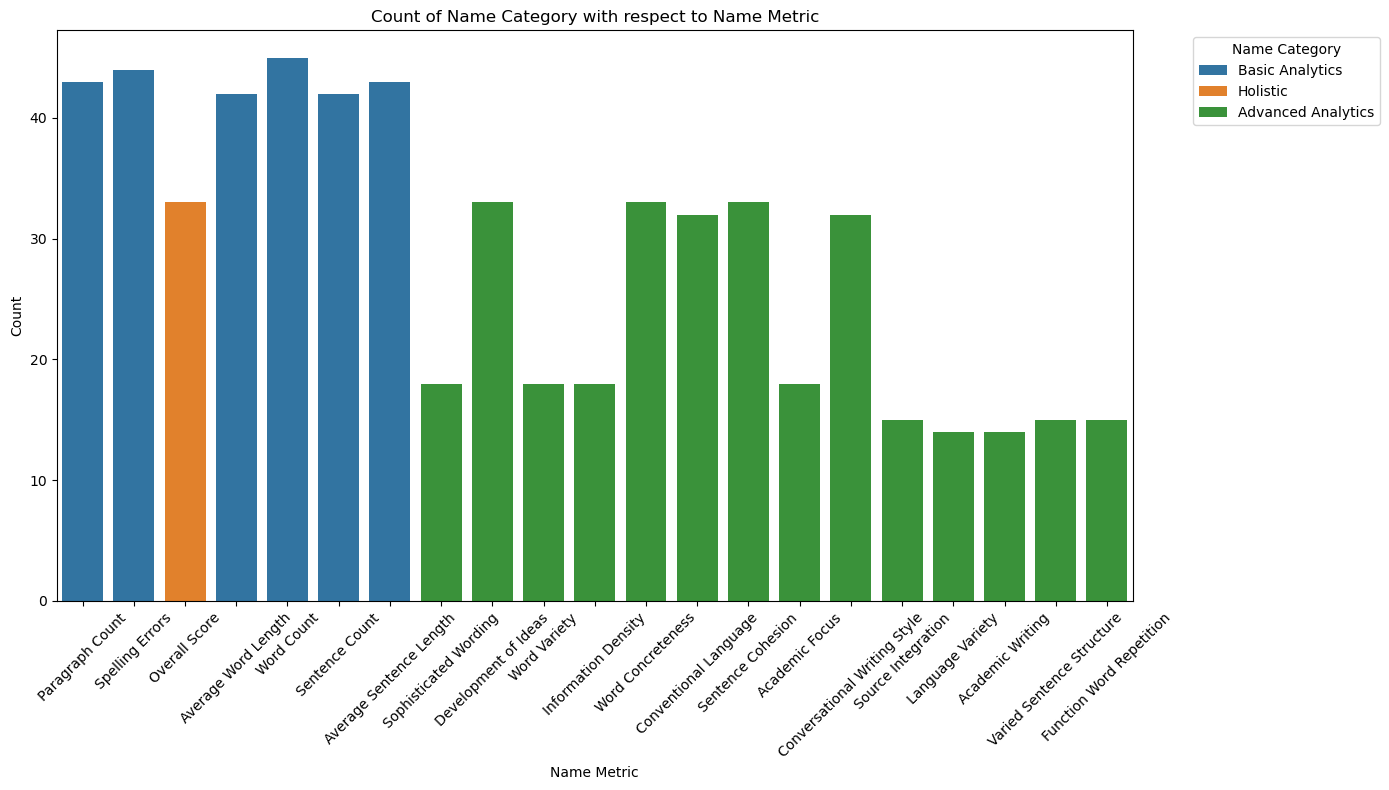

In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate top, middle, and bottom rows
selected_rows = pd.concat([top_rows, middle_rows, bottom_rows])

# Create a bar plot for count of name_category with respect to name_metric
plt.figure(figsize=(14, 8))
sns.countplot(data=selected_rows, x='name_metric', hue='name_category')
plt.title('Count of Name Category with respect to Name Metric')
plt.xlabel('Name Metric')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Name Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


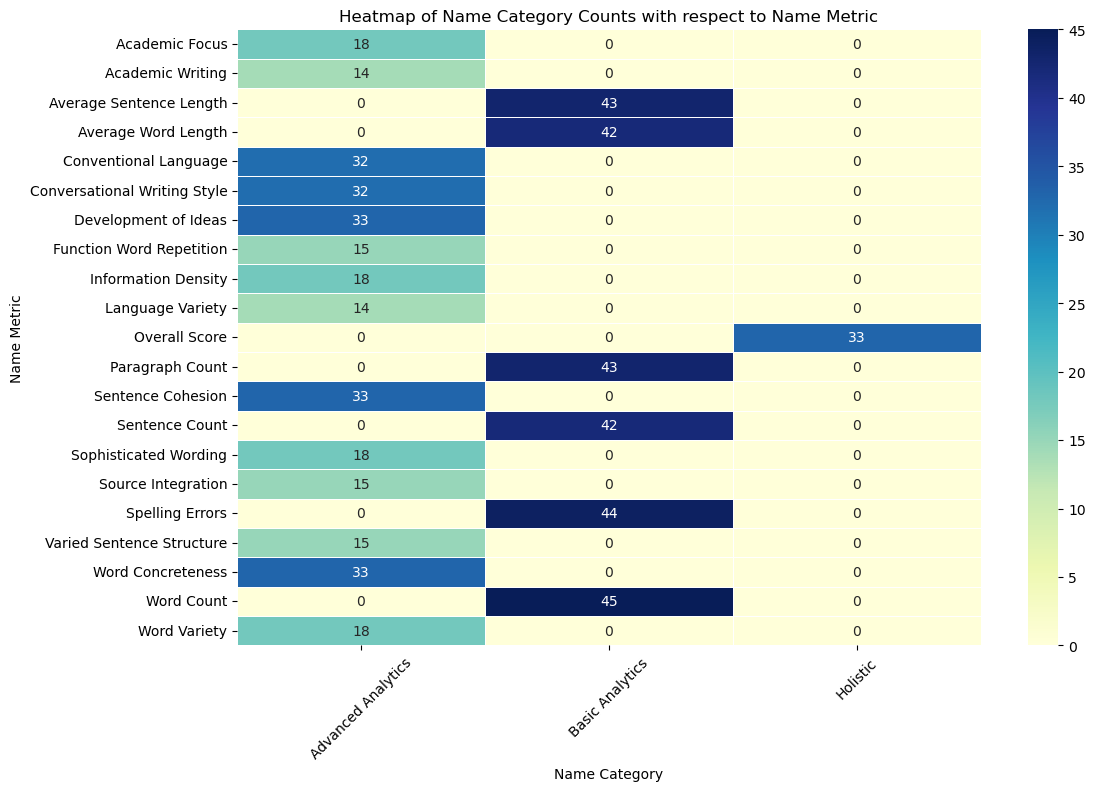

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab for count of name_category with respect to name_metric
heatmap_data = pd.crosstab(selected_rows['name_metric'], selected_rows['name_category'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Name Category Counts with respect to Name Metric')
plt.xlabel('Name Category')
plt.ylabel('Name Metric')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


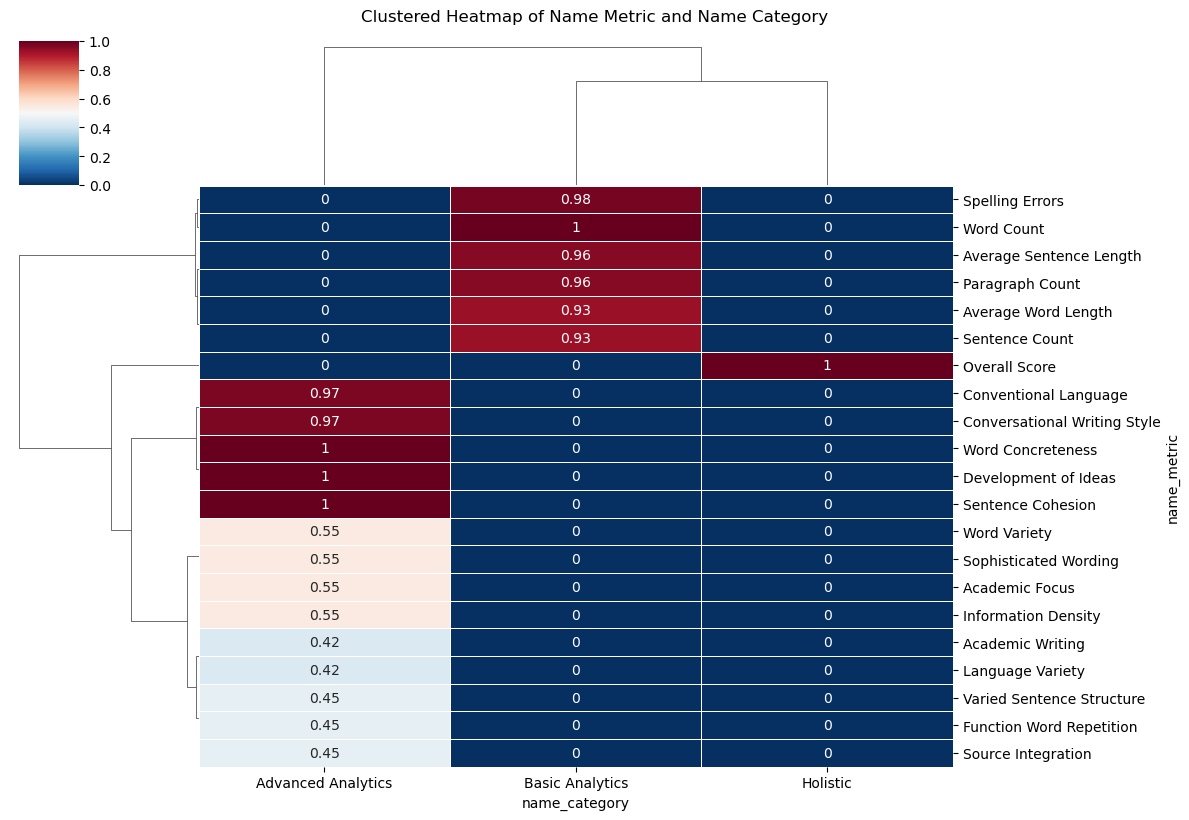

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clustered heatmap with row and column dendrograms
sns.clustermap(
    heatmap_data, cmap="RdBu_r", annot=True, linewidths=.5, figsize=(12, 8),
    standard_scale=1, method='ward'
)
plt.suptitle('Clustered Heatmap of Name Metric and Name Category', y=1.02)
plt.show()


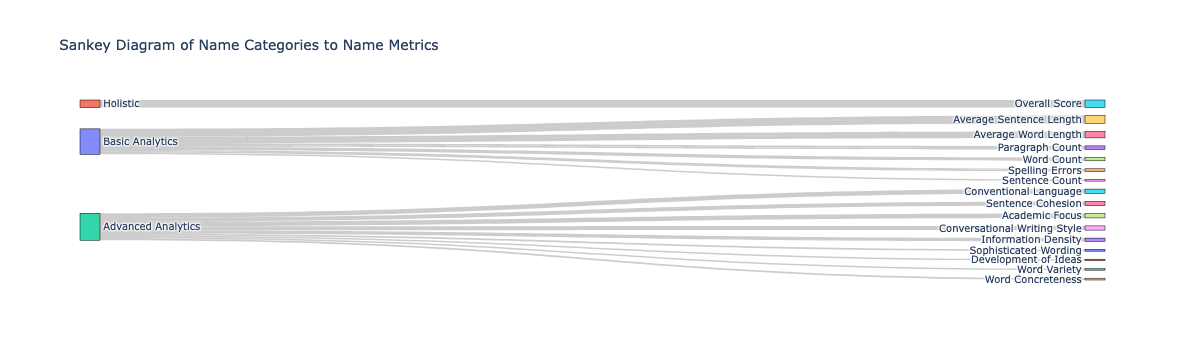

In [317]:
import plotly.graph_objects as go

# Prepare the data for Sankey diagram
name_category = selected_rows['name_category'].unique()
name_metric = selected_rows['name_metric'].unique()

# Create node labels
labels = list(name_category) + list(name_metric)

# Define source and target indices
source_indices = selected_rows['name_category'].apply(lambda x: labels.index(x))
target_indices = selected_rows['name_metric'].apply(lambda x: labels.index(x))

# Count of flows
values = selected_rows.groupby(['name_category', 'name_metric']).size().reset_index(name='count')['count']

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

fig.update_layout(title_text="Sankey Diagram of Name Categories to Name Metrics", font_size=10)
fig.show()


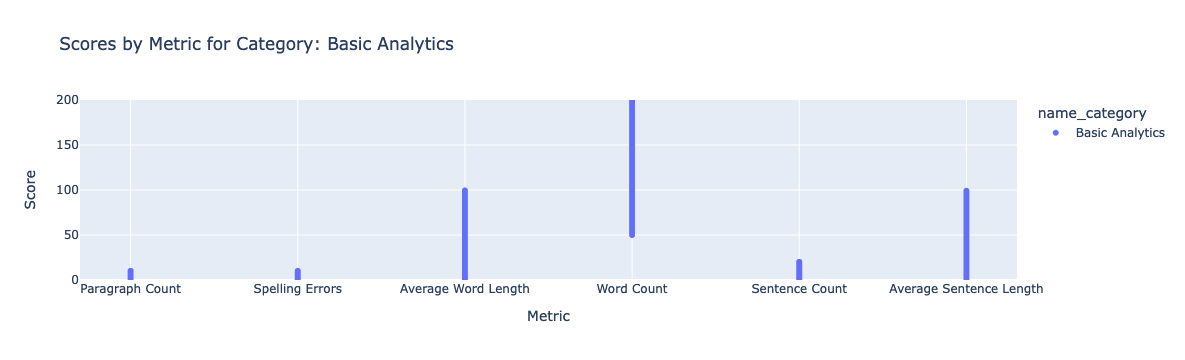

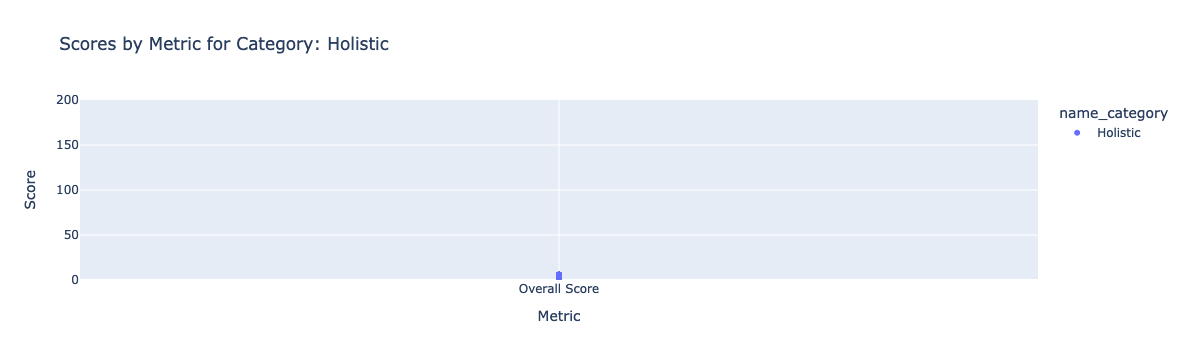

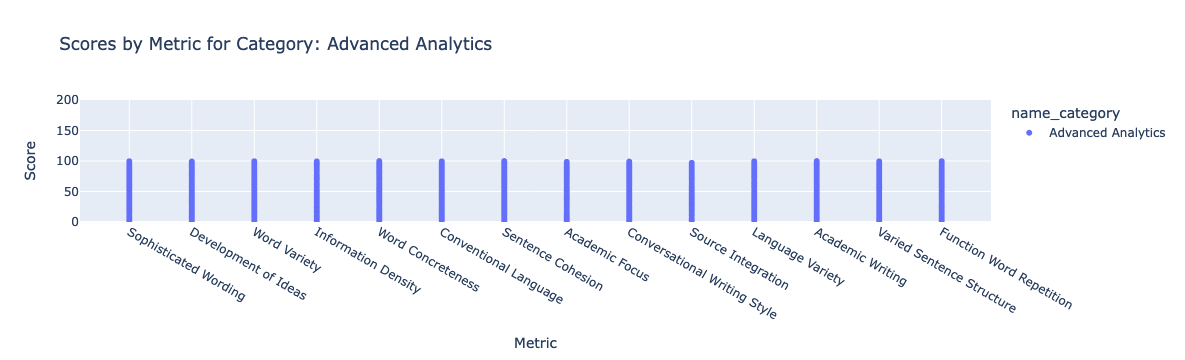

In [321]:
import plotly.express as px

# Define the y-axis range
y_axis_min = 0   # Define minimum value for the y-axis
y_axis_max = 200  # Define maximum value for the y-axis (adjust as needed)

# Create separate graphs for each unique 'name_category'
unique_categories = grouped['name_category'].unique()

# Create separate figures for each category
for category in unique_categories:
    # Filter data for the current category
    category_data = grouped[grouped['name_category'] == category]

    # Create scatter plot
    fig = px.scatter(
        category_data,
        x='name_metric',
        y='score',
        color='name_category',
        title=f'Scores by Metric for Category: {category}',
        labels={'score': 'Score', 'name_metric': 'Metric'},  # Customize axis labels if needed
    )

    # Update y-axis range
    fig.update_layout(
        yaxis=dict(range=[y_axis_min, y_axis_max])  # Set the y-axis range
    )

    # Show the figure
    fig.show()


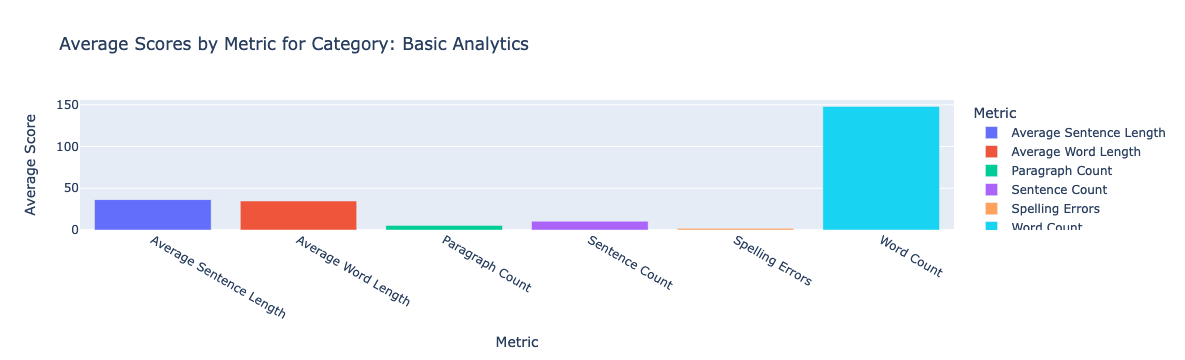

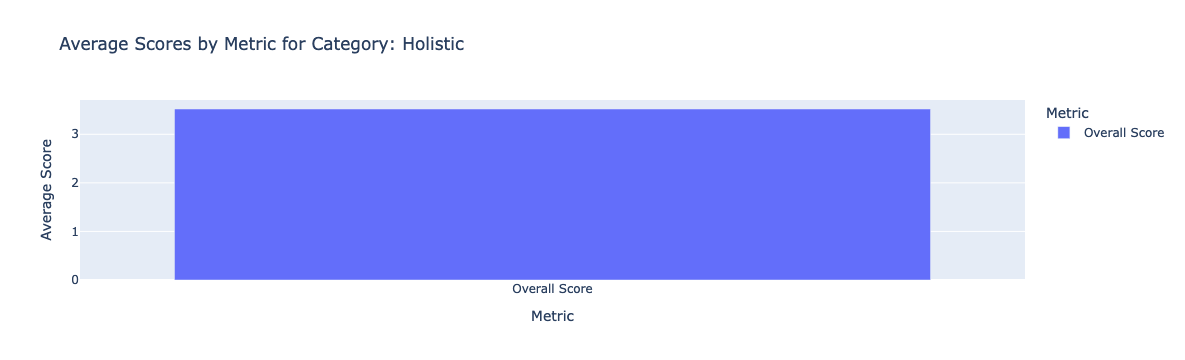

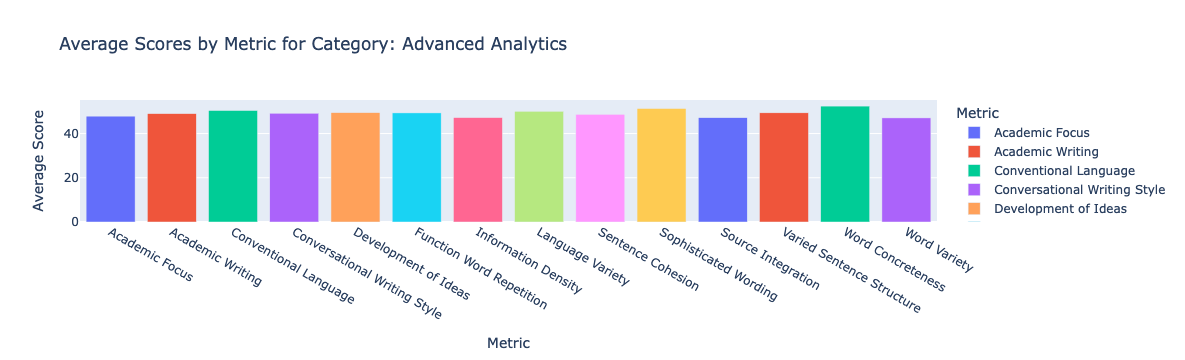

In [322]:
# Segregate data for each category
category_1_data = grouped[grouped['name_category'] == 'Basic Analytics']
category_2_data = grouped[grouped['name_category'] == 'Holistic']
category_3_data = grouped[grouped['name_category'] == 'Advanced Analytics']

# Calculate average scores for each metric in the categories
category_1_avg = category_1_data.groupby('name_metric')['score'].mean().reset_index()
category_1_avg['name_category'] = 'Basic Analytics'

category_2_avg = category_2_data.groupby('name_metric')['score'].mean().reset_index()
category_2_avg['name_category'] = 'Holistic'

category_3_avg = category_3_data.groupby('name_metric')['score'].mean().reset_index()
category_3_avg['name_category'] = 'Advanced Analytics'

# Concatenate all categories into a single DataFrame
avg_scores_df = pd.concat([category_1_avg, category_2_avg, category_3_avg])

# Plot for Category 1
fig_category_1 = px.bar(
    avg_scores_df[avg_scores_df['name_category'] == 'Basic Analytics'],
    x='name_metric',
    y='score',
    title='Average Scores by Metric for Category: Basic Analytics',
    labels={'score': 'Average Score', 'name_metric': 'Metric'},
    color='name_metric'
)

# Plot for Category 2
fig_category_2 = px.bar(
    avg_scores_df[avg_scores_df['name_category'] == 'Holistic'],
    x='name_metric',
    y='score',
    title='Average Scores by Metric for Category: Holistic',
    labels={'score': 'Average Score', 'name_metric': 'Metric'},
    color='name_metric'
)

# Plot for Category 3
fig_category_3 = px.bar(
    avg_scores_df[avg_scores_df['name_category'] == 'Advanced Analytics'],
    x='name_metric',
    y='score',
    title='Average Scores by Metric for Category: Advanced Analytics',
    labels={'score': 'Average Score', 'name_metric': 'Metric'},
    color='name_metric'
)

# Show plots
fig_category_1.show()
fig_category_2.show()
fig_category_3.show()

In [323]:
import pandas as pd

# Load the datasets
essay_df = pd.read_csv('backend_essay - backend_essay.csv')
classroom_students_df = pd.read_csv('classroom_students - backend_classroom_students.csv')

# Check the column names in classroom_students_df to confirm 'classroom_id' exists
print(classroom_students_df.columns)



Index(['classroom_id', 'user_id'], dtype='object')


In [325]:
# Merge the datasets on student_id and user_id, keeping all columns
merged_df = pd.merge(
    essay_df, classroom_students_df,
    left_on='student_id', right_on='user_id',
    how='inner',
    suffixes=('', '_classroom')  # Avoids column name conflicts
)

# Check if 'classroom_id' is in the merged dataframe
if 'classroom_id' not in merged_df.columns:
    raise KeyError("'classroom_id' column not found in the merged dataframe. Check the original dataframes for the correct column name.")

# Display the columns of the merged DataFrame for verification
print("Columns in the merged DataFrame:")
print(merged_df.columns)

# Group by 'classroom_id' and list all students associated with them
classroom_students = merged_df.groupby('classroom_id')['student_id'].unique().reset_index()

# Display the results
print("Classroom IDs and Associated Students:")
print(classroom_students)

# Optionally, to see the detailed information
for index, row in classroom_students.iterrows():
    classroom_id = row['classroom_id']
    students = row['student_id']
    print(f"\nClassroom ID: {classroom_id}")
    print(f"Students: {', '.join(map(str, students))}")


Columns in the merged DataFrame:
Index(['id', 'essay', 'submission_type', 'state', 'submitted_on', 'student_id',
       'task_id', 'is_reviewed', 'essay_html', 'classroom_id',
       'classroom_id_classroom', 'user_id'],
      dtype='object')
Classroom IDs and Associated Students:
   classroom_id                                         student_id
0             1  [9, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 18, ...
1             3  [14, 6, 24, 9, 13, 11, 4, 26, 7, 5, 8, 2, 12, ...
2             6                [9, 13, 26, 8, 4, 14, 5, 11, 3, 18]
3            41                                               [65]

Classroom ID: 1
Students: 9, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 18, 13, 2, 26, 24, 16, 23, 17

Classroom ID: 3
Students: 14, 6, 24, 9, 13, 11, 4, 26, 7, 5, 8, 2, 12, 3, 15, 18, 10

Classroom ID: 6
Students: 9, 13, 26, 8, 4, 14, 5, 11, 3, 18

Classroom ID: 41
Students: 65


/var/folders/5l/1dxt54xd5dn9fs97lbsrm2ch0000gp/T/ipykernel_11293/1457316605.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




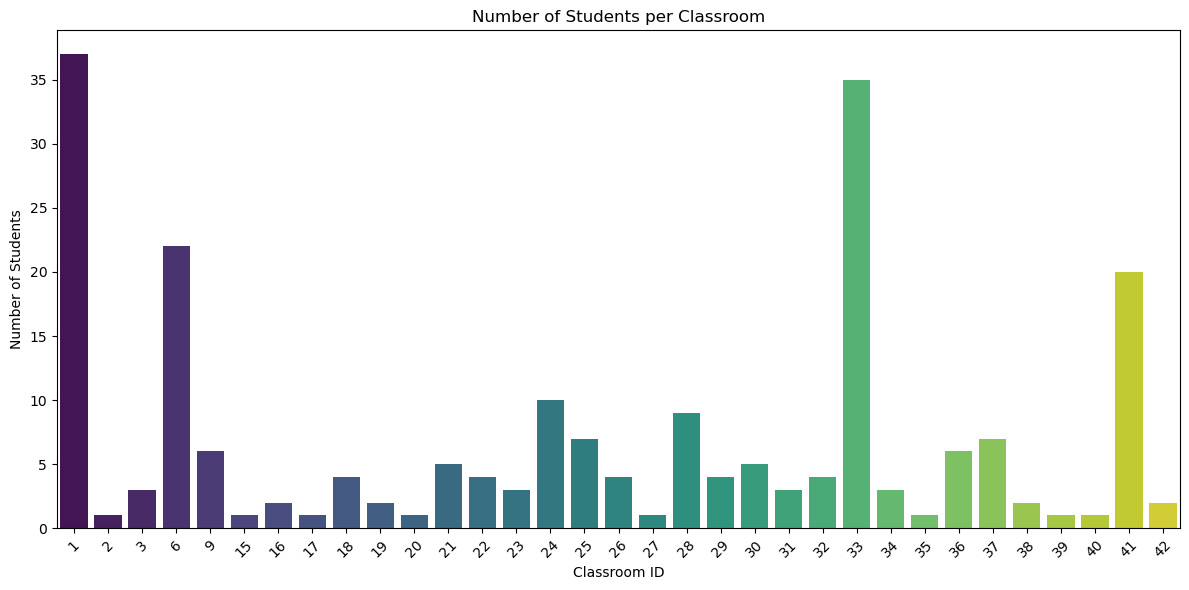

In [327]:
# Count the number of students per classroom
classroom_student_counts = classroom_students_df['classroom_id'].value_counts().reset_index()
classroom_student_counts.columns = ['classroom_id', 'student_count']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=classroom_student_counts, x='classroom_id', y='student_count', palette='viridis')
plt.title('Number of Students per Classroom')
plt.xlabel('Classroom ID')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

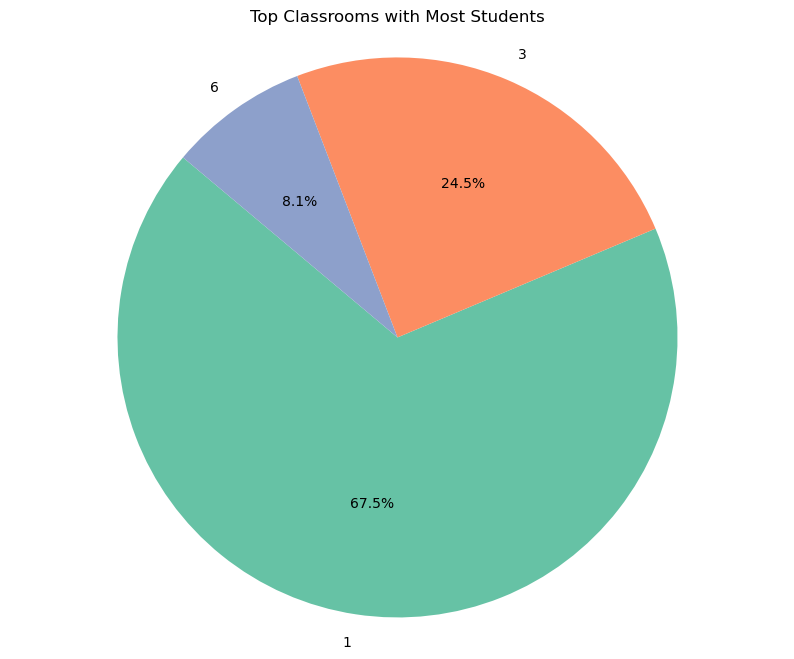

In [334]:
# Get the top 10 classrooms with the most students
top_10_classrooms = classroom_student_counts.nlargest(10, 'student_count')

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(top_10_classrooms['student_count'], labels=top_10_classrooms['classroom_id'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Top Classrooms with Most Students')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

In [339]:
# Merge datasets on 'student_id' and 'user_id'
merged_df = pd.merge(
    essay_df, classroom_students_df,
    left_on='student_id', right_on='user_id',
    how='outer',  # Use 'outer' join to combine all data from both datasets
    suffixes=('', '_classroom')  # Avoids column name conflicts
)

# Combine both columns to consider all students (user_id and student_id are considered the same)
merged_df['student_id_combined'] = merged_df['student_id'].combine_first(merged_df['user_id'])

# Drop duplicates to avoid counting the same student multiple times if they appear in both datasets
merged_df = merged_df.drop_duplicates(subset=['classroom_id', 'student_id_combined'])

# Group by 'classroom_id' to calculate the number of unique students
students_per_classroom = merged_df.groupby('classroom_id')['student_id_combined'].nunique().reset_index()
students_per_classroom.columns = ['classroom_id', 'student_count']

# Display the results
print("Total Number of Students Enrolled in Each Classroom:")
print(students_per_classroom)

Total Number of Students Enrolled in Each Classroom:
   classroom_id  student_count
0           1.0             22
1           3.0             18
2           6.0             10
3          41.0              1


In [340]:
# Load the dataset
classroom_students_df = pd.read_csv('classroom_students - backend_classroom_students.csv')

# Group by 'classroom_id' and count unique 'user_id' (which is equivalent to 'student_id')
students_per_classroom_classroom_students = classroom_students_df.groupby('classroom_id')['user_id'].nunique().reset_index()
students_per_classroom_classroom_students.columns = ['classroom_id', 'student_count']

# Display the results
print("Total Number of Students Enrolled in Each Classroom (classroom_students_df):")
print(students_per_classroom_classroom_students)

Total Number of Students Enrolled in Each Classroom (classroom_students_df):
    classroom_id  student_count
0              1             37
1              2              1
2              3              3
3              6             22
4              9              6
5             15              1
6             16              2
7             17              1
8             18              4
9             19              2
10            20              1
11            21              5
12            22              4
13            23              3
14            24             10
15            25              7
16            26              4
17            27              1
18            28              9
19            29              4
20            30              5
21            31              3
22            32              4
23            33             35
24            34              3
25            35              1
26            36              6
27            37           

In [343]:
# Group by 'classroom_id' and aggregate 'user_id' into a list
students_list_per_classroom = classroom_students_df.groupby('classroom_id')['user_id'].apply(list).reset_index()
students_list_per_classroom.columns = ['classroom_id', 'student_ids']

# Display the first 20 rows
print("List of Student IDs Against Each Classroom (First 20):")
print(students_list_per_classroom.head(20))

List of Student IDs Against Each Classroom (First 20):
    classroom_id                                        student_ids
0              1  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
1              2                                                [2]
2              3                                        [2, 22, 23]
3              6  [3, 4, 5, 6, 7, 11, 12, 13, 24, 52, 53, 54, 55...
4              9                              [4, 5, 7, 21, 22, 29]
5             15                                               [24]
6             16                                           [18, 36]
7             17                                               [36]
8             18                                    [4, 13, 18, 26]
9             19                                            [4, 46]
10            20                                               [46]
11            21                                [7, 12, 14, 15, 41]
12            22                                     [5, 9, 1

In [348]:
print(merged_df.columns)


Index(['id', 'essay', 'submission_type', 'state', 'submitted_on', 'student_id',
       'task_id', 'is_reviewed', 'essay_html', 'classroom_id',
       'classroom_id_classroom', 'user_id', 'student_id_combined'],
      dtype='object')


In [373]:
# Merge datasets
merged_df = pd.merge(
    essay_df, classroom_students_df,
    left_on='student_id', right_on='user_id',
    how='inner',
    suffixes=('', '_classroom')
)

# Exclude classroom_id 41
filtered_df = merged_df[merged_df['classroom_id'] != 41]

# Get the list of students per classroom
classroom_students = filtered_df.groupby('classroom_id')['student_id'].apply(list).reset_index()

# Print all student_id for each classroom_id
for index, row in classroom_students.iterrows():
    classroom_id = row['classroom_id']
    students = row['student_id']
    print(f"\nClassroom ID: {classroom_id}")
    print(f"Student IDs: {', '.join(map(str, students))}")


Classroom ID: 1
Student IDs: 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 13, 13, 13, 13, 13, 13, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 8, 8, 8, 8, 8, 8, 11, 11, 11, 11, 11, 11, 11, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 18, 18, 18, 18, 18, 14, 14, 14, 14, 4, 4, 4, 4, 

In [387]:
print(classroom_students.columns)
print(filtered_df.columns)



Index(['classroom_id', 'level_1', 'count'], dtype='object')
Index(['id', 'essay', 'submission_type', 'state', 'submitted_on', 'student_id',
       'task_id', 'is_reviewed', 'essay_html', 'classroom_id',
       'classroom_id_classroom', 'user_id'],
      dtype='object')


In [397]:
# Exclude classroom_id 41
filtered_df = merged_df[merged_df['classroom_id'] != 41]

# Get the list of unique students per classroom
classroom_students = filtered_df.groupby('classroom_id')['student_id'].apply(lambda x: list(set(x))).reset_index()

# Print all unique student_id for each classroom_id
for index, row in classroom_students.iterrows():
    classroom_id = row['classroom_id']
    students = row['student_id']
    print(f"\nClassroom ID: {classroom_id}")
    print(f"Unique Student IDs: {', '.join(map(str, students))}")


Classroom ID: 1
Unique Student IDs: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 26

Classroom ID: 3
Unique Student IDs: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 24, 26

Classroom ID: 6
Unique Student IDs: 3, 4, 5, 8, 9, 11, 13, 14, 18, 26


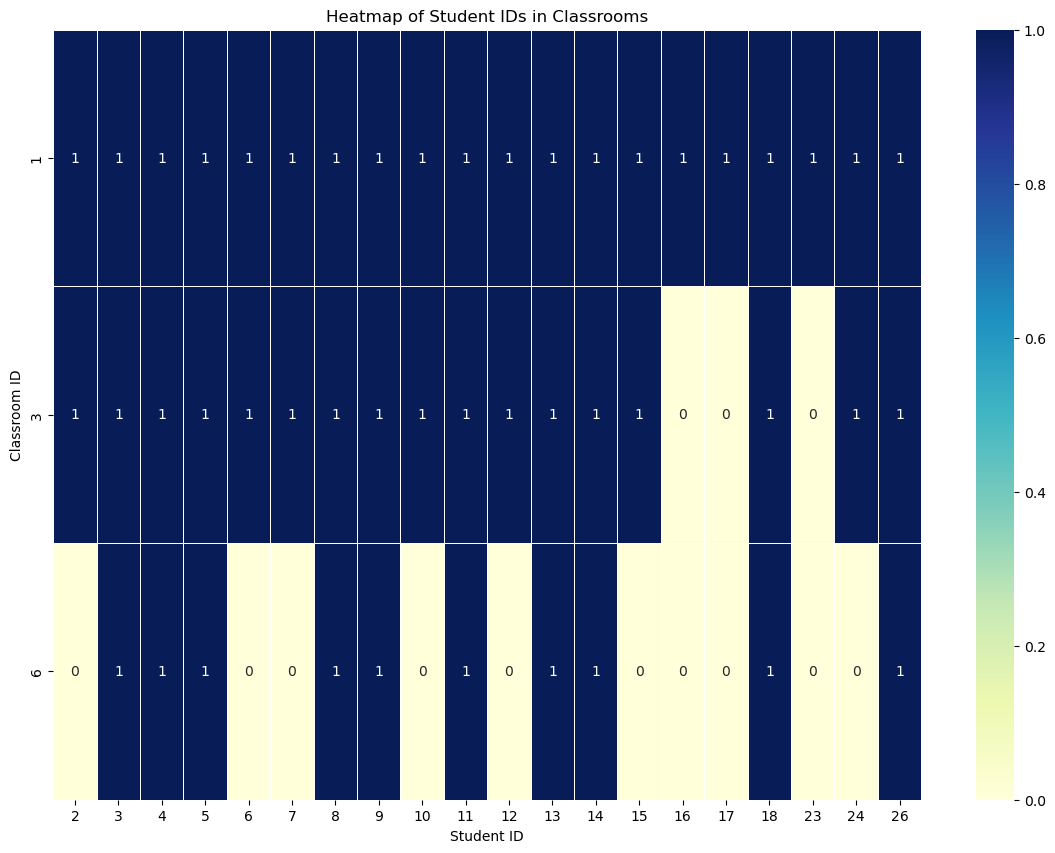

In [399]:
# Exclude classroom_id 41
filtered_df = merged_df[merged_df['classroom_id'] != 41]

# Get the unique students per classroom
classroom_students = filtered_df.groupby('classroom_id')['student_id'].apply(lambda x: list(set(x))).reset_index()

# Create a list of all unique student IDs
all_students = sorted(set(filtered_df['student_id']))

# Create a binary matrix for the heatmap
heatmap_data = pd.DataFrame(
    0, 
    index=classroom_students['classroom_id'], 
    columns=all_students
)

# Populate the matrix
for _, row in classroom_students.iterrows():
    classroom_id = row['classroom_id']
    students = row['student_id']
    heatmap_data.loc[classroom_id, students] = 1

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap of Student IDs in Classrooms")
plt.xlabel("Student ID")
plt.ylabel("Classroom ID")
plt.show()

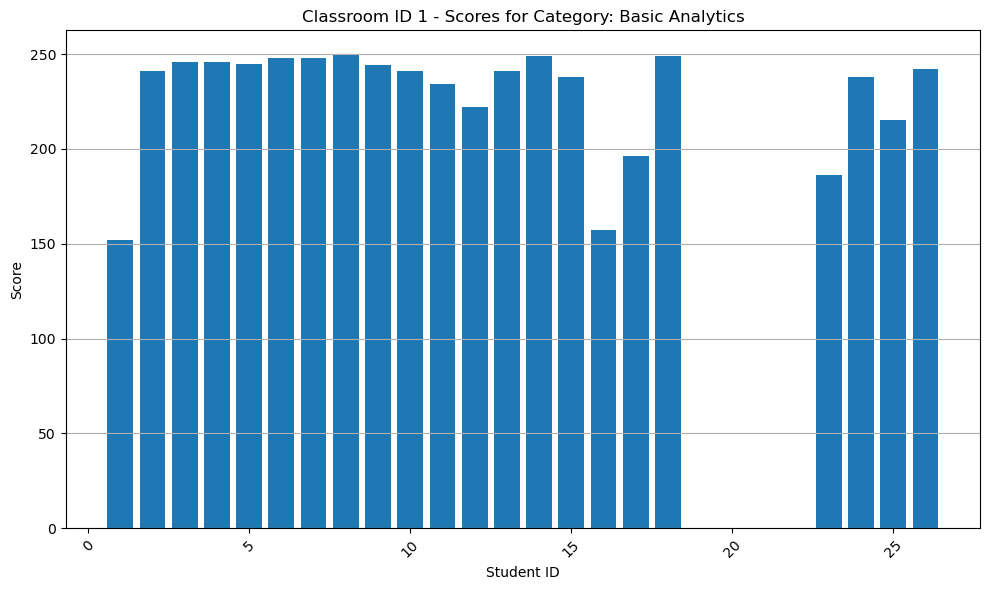

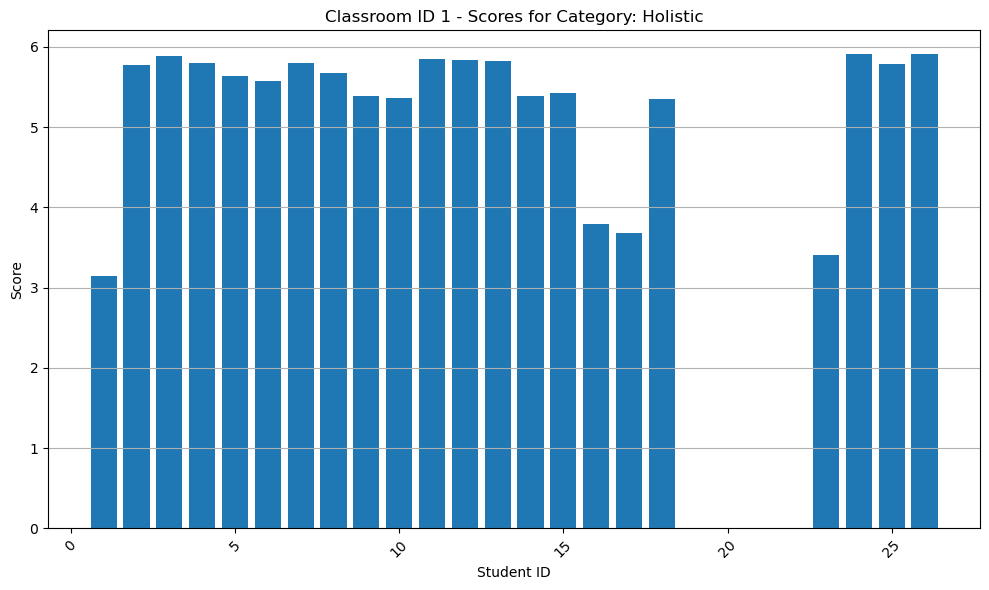

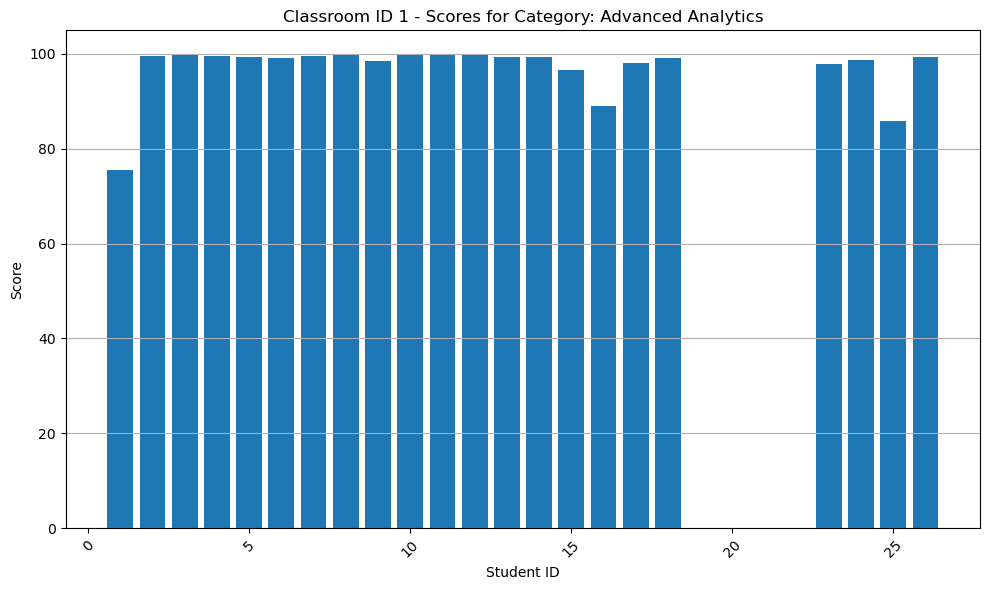

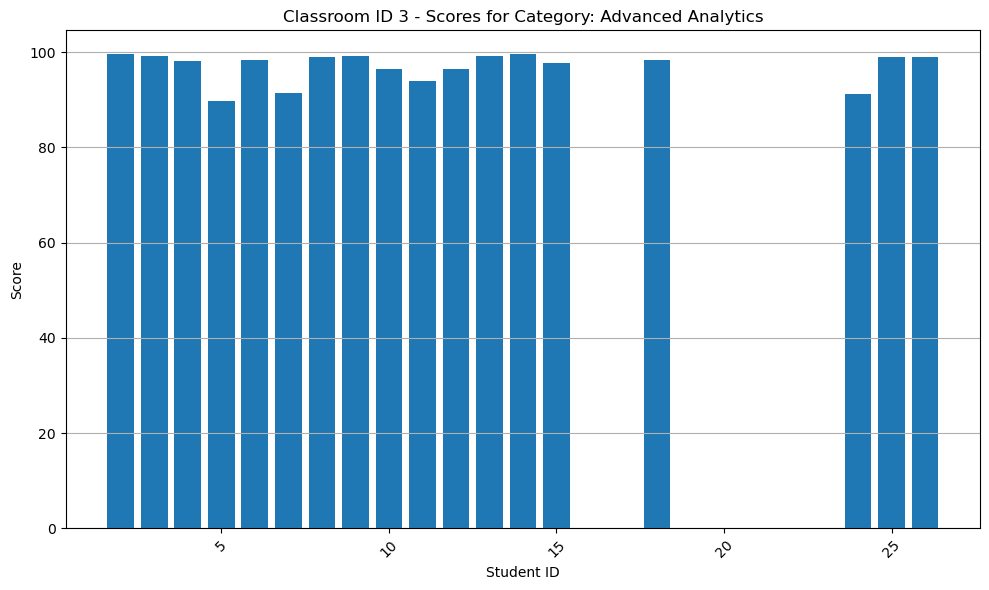

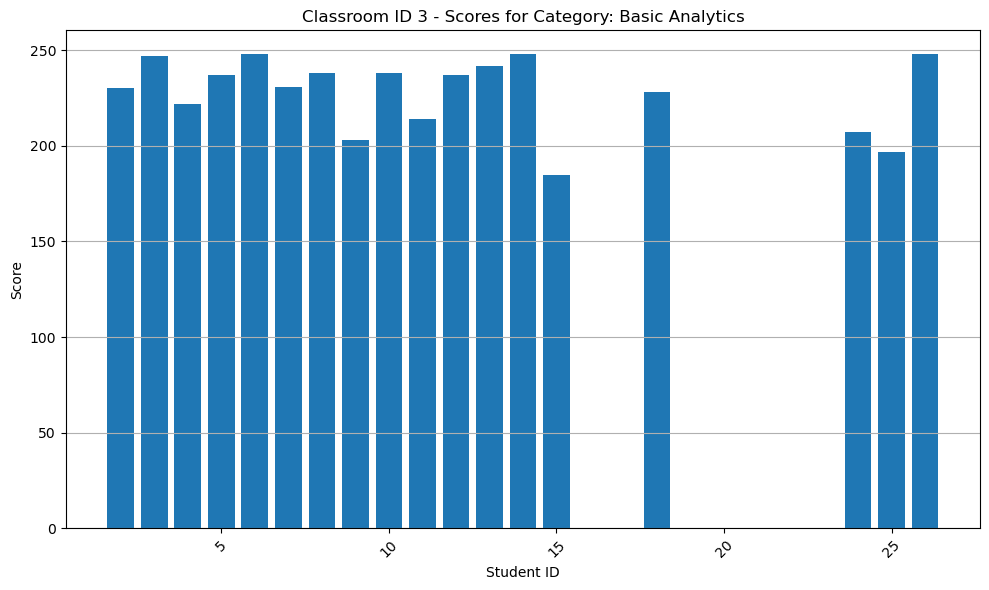

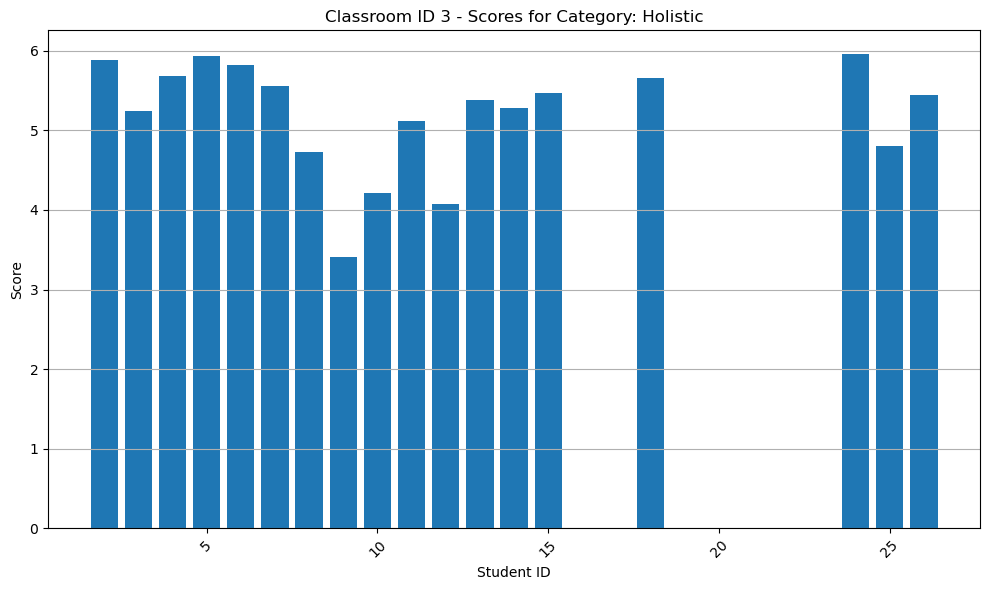

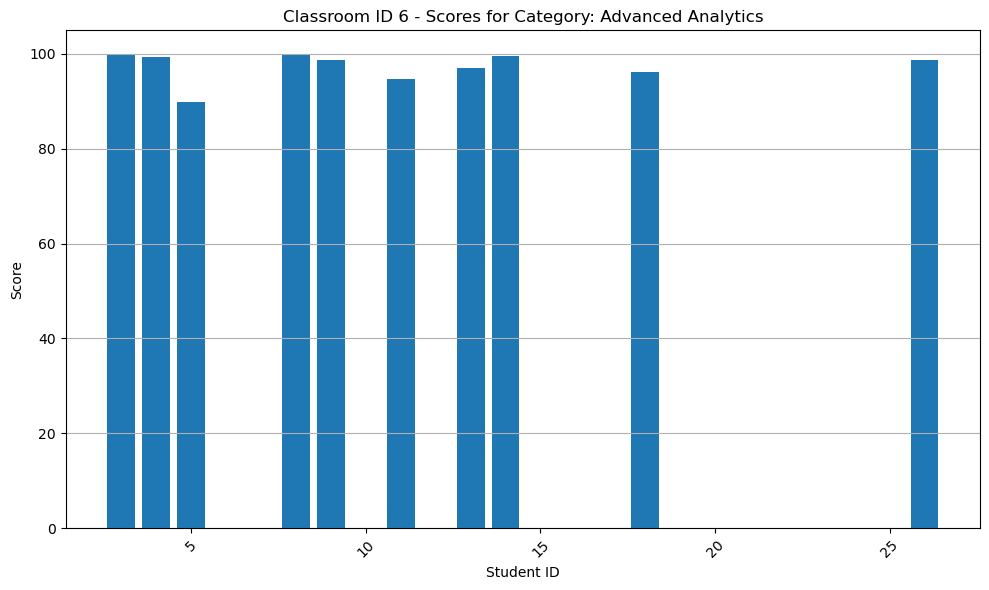

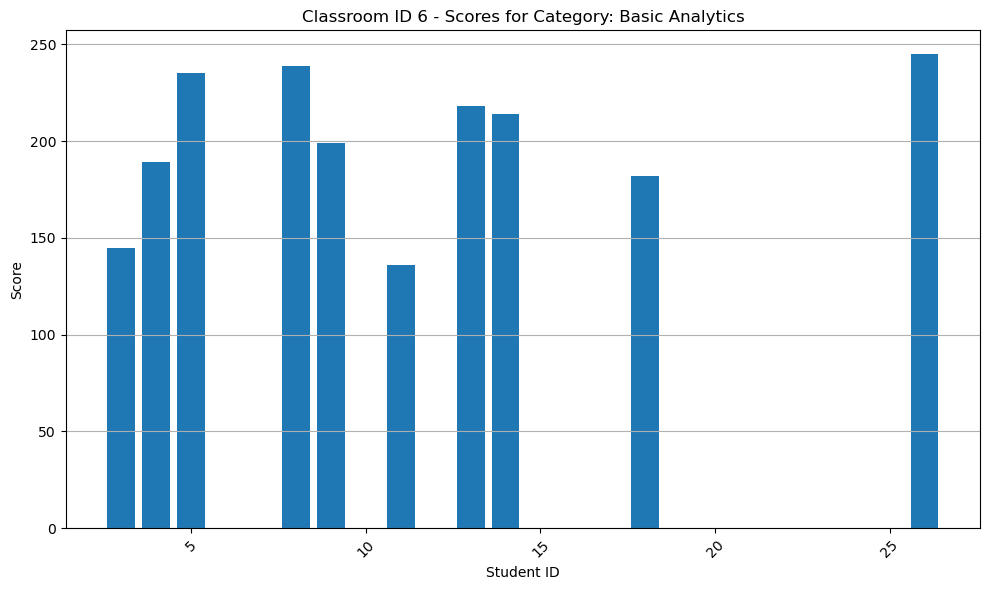

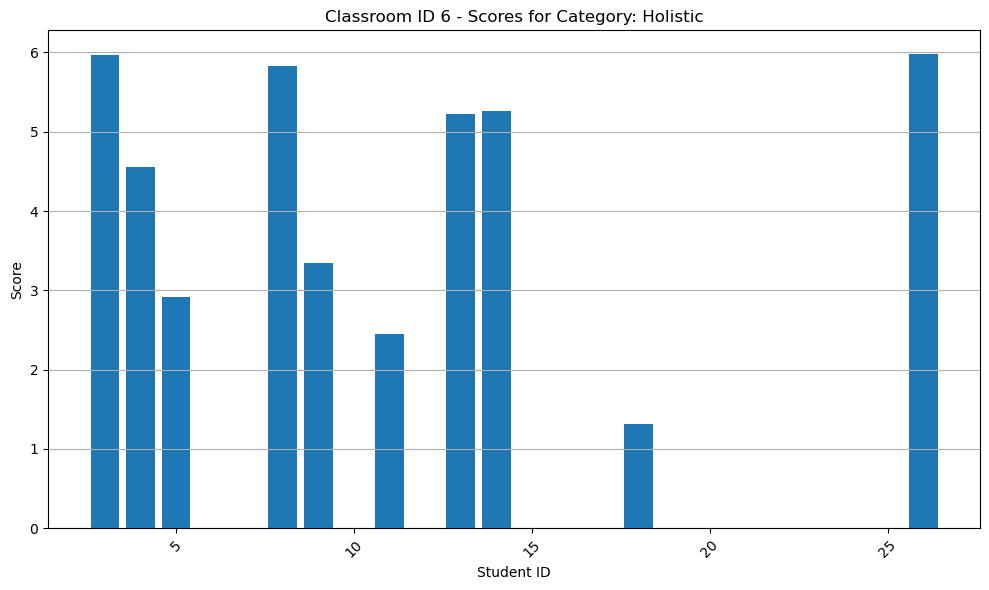

In [417]:
# Merge DataFrames with suffixes to avoid conflicts
merged_essay_score_df = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id', suffixes=('', '_score'))
merged_essay_score_metric_df = pd.merge(merged_essay_score_df, metric_df, left_on='metric_id', right_on='id', suffixes=('', '_metric'))
merged_metric_category_df = pd.merge(merged_essay_score_metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('', '_category'))
merged_essay_classroom_df = pd.merge(merged_metric_category_df, classroom_students_df, left_on='classroom_id', right_on='classroom_id')

# Filter for specified classroom IDs
classroom_ids = [1, 3, 6]

# Plot scores by category for each classroom ID
for classroom_id in classroom_ids:
    classroom_data = merged_essay_classroom_df[merged_essay_classroom_df['classroom_id'] == classroom_id]
    
    # Group by category and student and aggregate scores
    for category in classroom_data['name_category'].unique():
        category_data = classroom_data[classroom_data['name_category'] == category]
        plt.figure(figsize=(10, 6))
        plt.bar(category_data['student_id'], category_data['score'])
        plt.title(f"Classroom ID {classroom_id} - Scores for Category: {category}")
        plt.xlabel("Student ID")
        plt.ylabel("Score")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

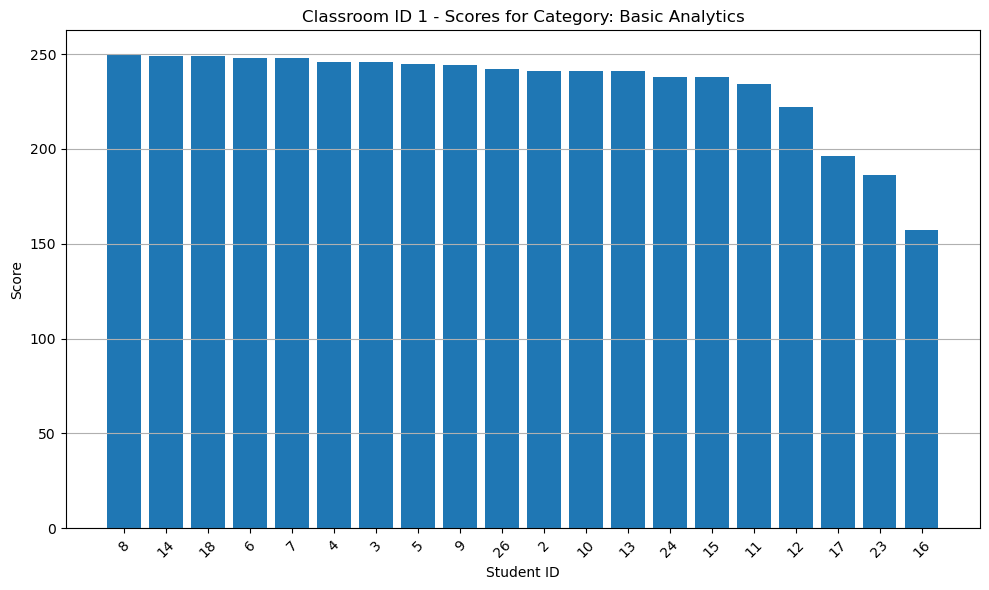

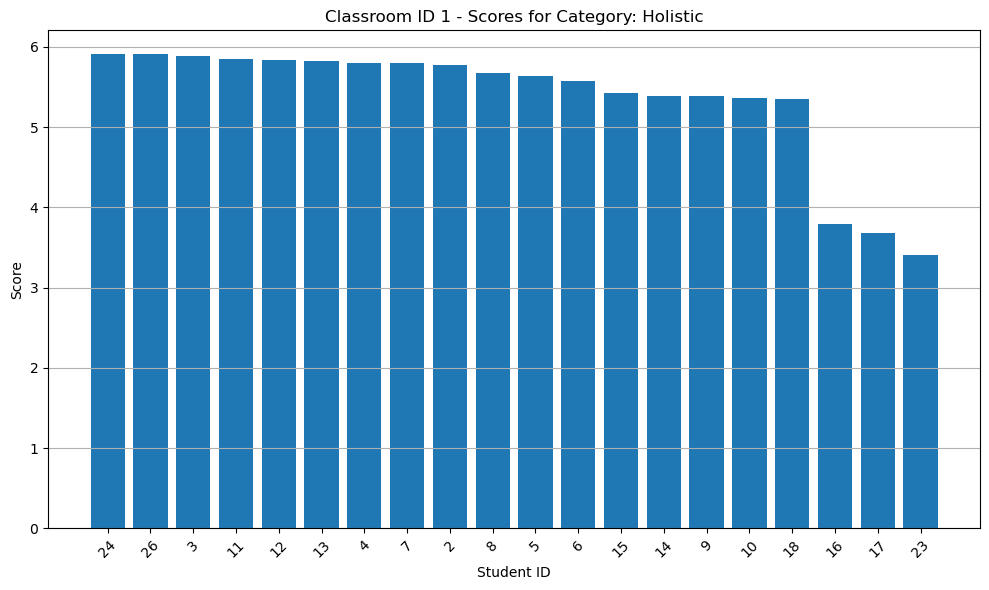

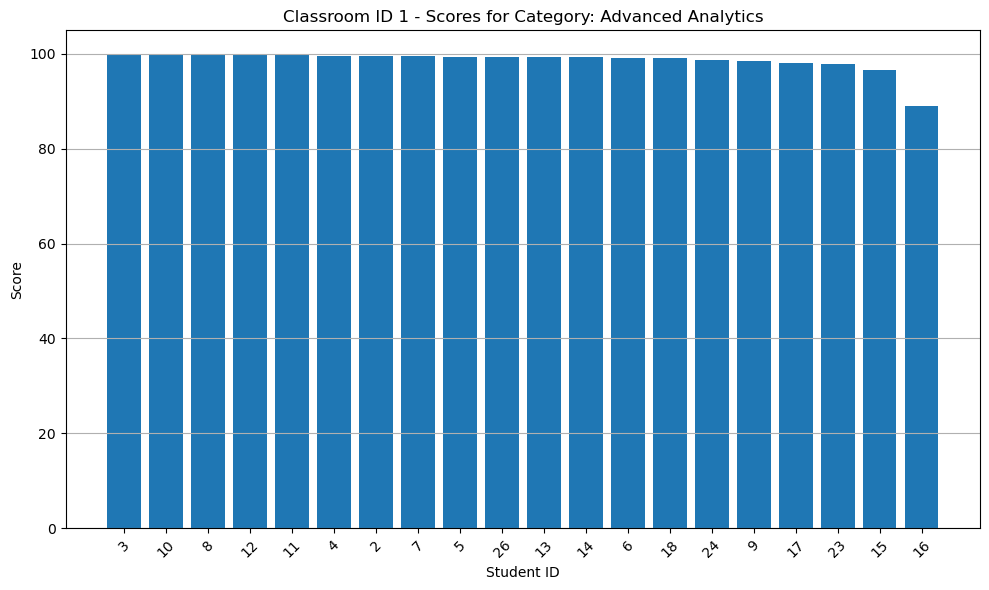

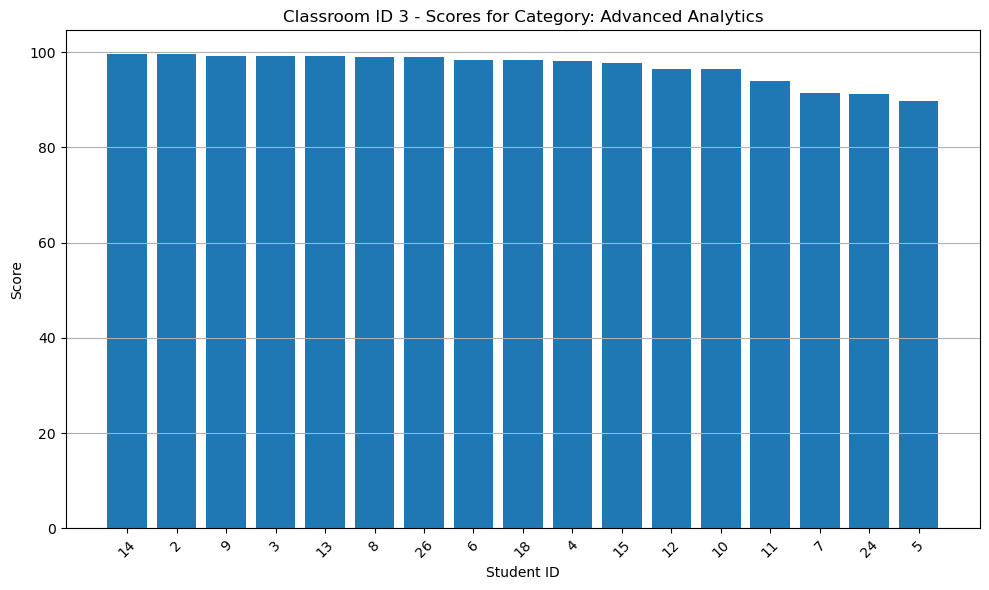

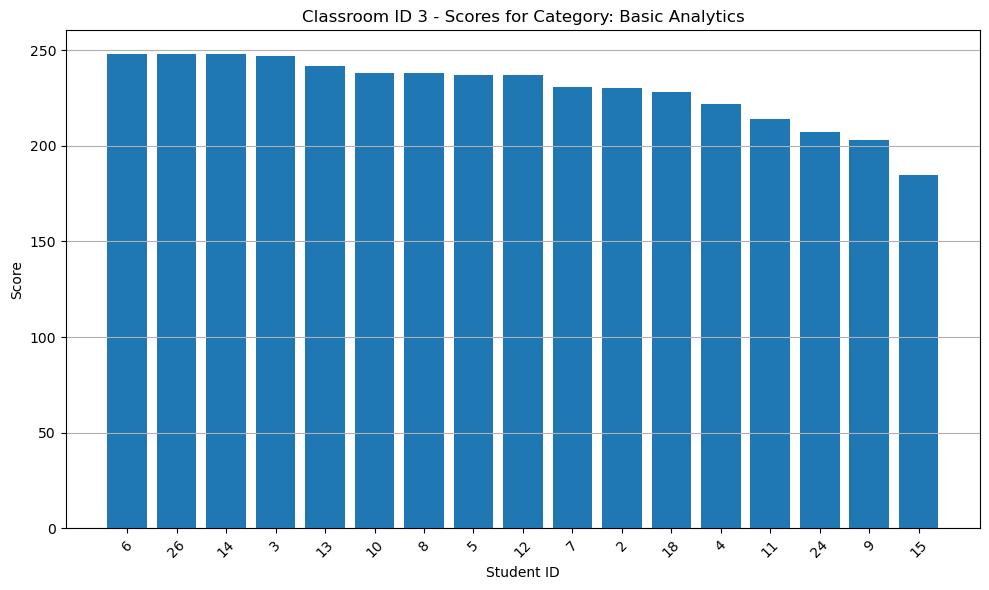

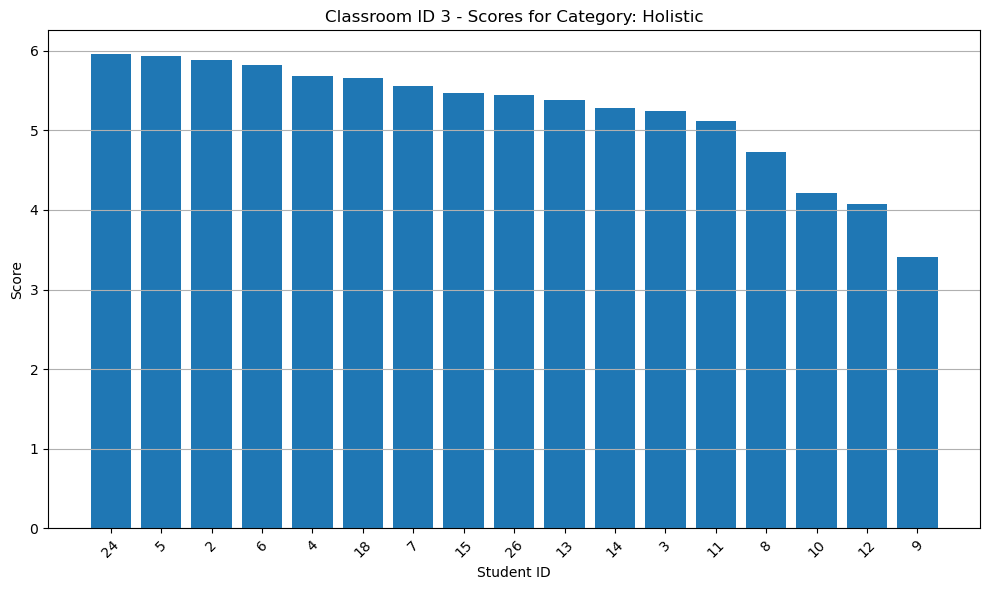

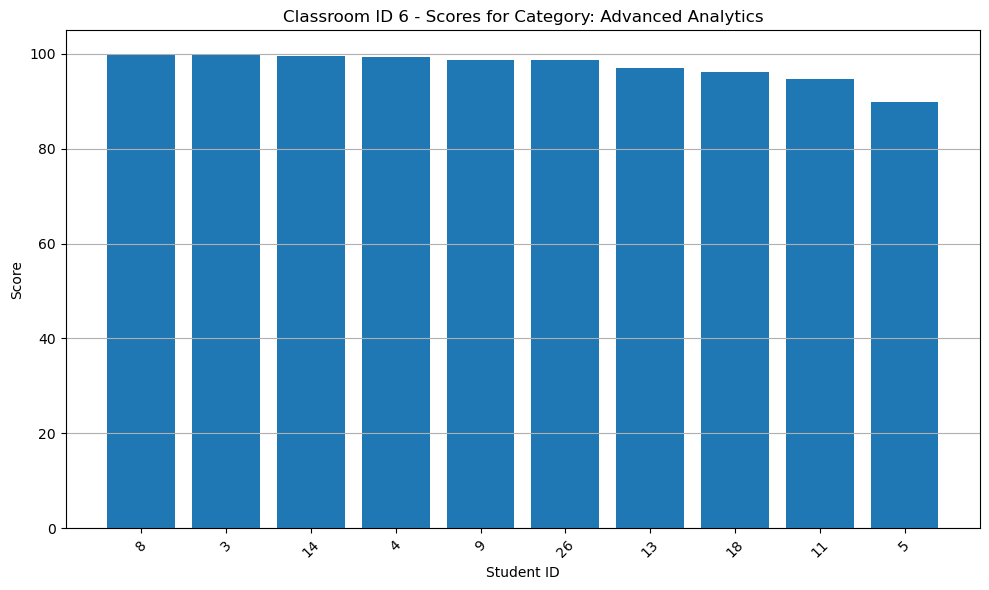

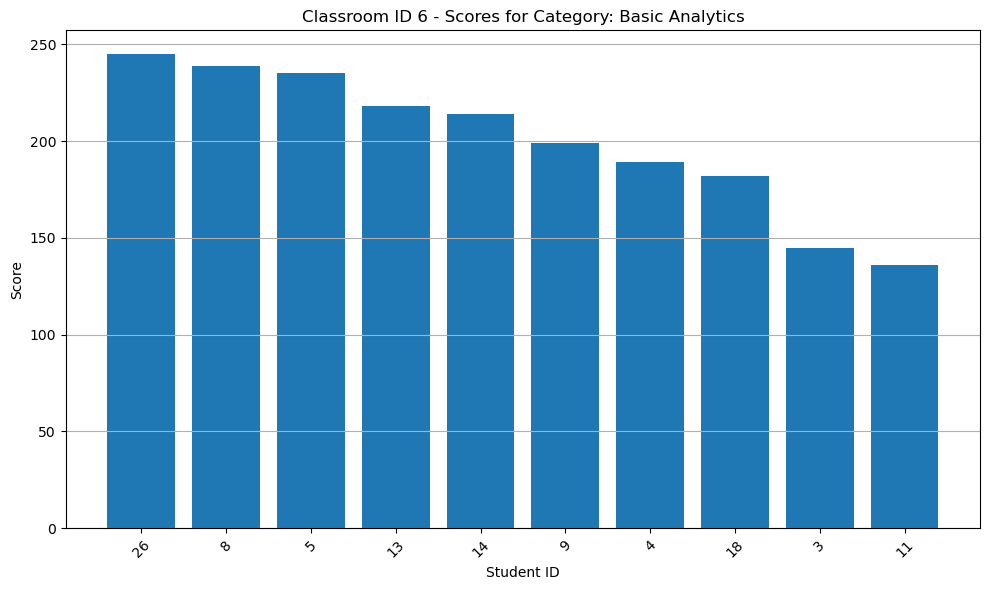

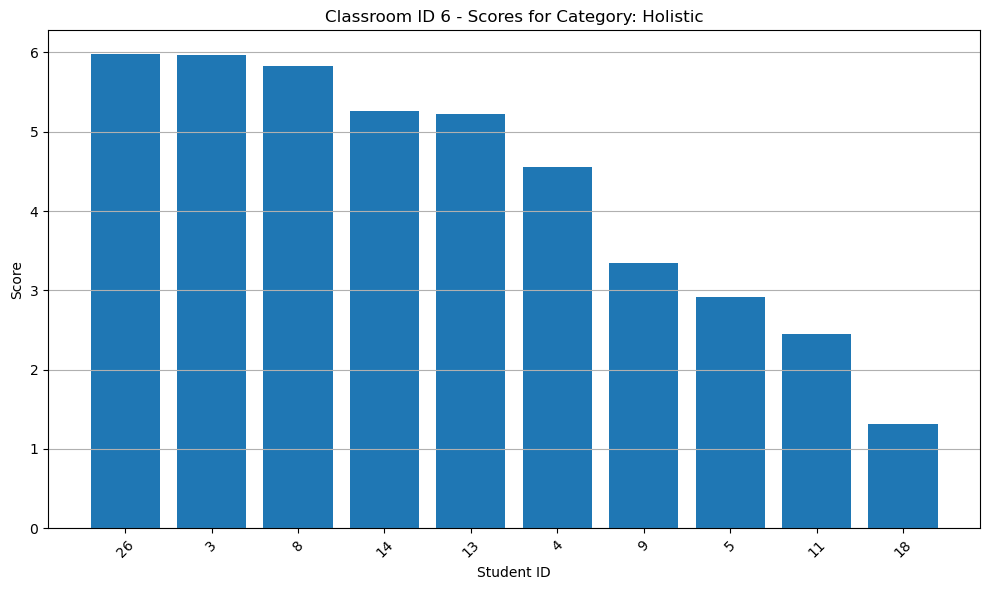

In [425]:
# Assuming essay_df, essay_score_df, metric_df, metriccategory_df, and classroom_students_df are already loaded

# Merge DataFrames with suffixes to avoid conflicts
merged_essay_score_df = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id', suffixes=('', '_score'))
merged_essay_score_metric_df = pd.merge(merged_essay_score_df, metric_df, left_on='metric_id', right_on='id', suffixes=('', '_metric'))
merged_metric_category_df = pd.merge(merged_essay_score_metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('', '_category'))
merged_essay_classroom_df = pd.merge(merged_metric_category_df, classroom_students_df, left_on='classroom_id', right_on='classroom_id')

# Filter for specified classroom IDs
classroom_ids = [1, 3, 6]

# Define a dictionary to map classroom IDs to their respective unique student IDs
student_ids = {
    1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 26],
    3: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 24, 26],
    6: [3, 4, 5, 8, 9, 11, 13, 14, 18, 26]
}

# Plot scores by category for each classroom ID
for classroom_id in classroom_ids:
    classroom_data = merged_essay_classroom_df[merged_essay_classroom_df['classroom_id'] == classroom_id]
    
    # Filter data to include only the specified student IDs
    classroom_data = classroom_data[classroom_data['student_id'].isin(student_ids[classroom_id])]
    
    # Plot each category separately
    for category in classroom_data['name_category'].unique():
        category_data = classroom_data[classroom_data['name_category'] == category]
        category_data = category_data.sort_values(by='score', ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(category_data['student_id'].astype(str), category_data['score'])
        plt.title(f"Classroom ID {classroom_id} - Scores for Category: {category}")
        plt.xlabel("Student ID")
        plt.ylabel("Score")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

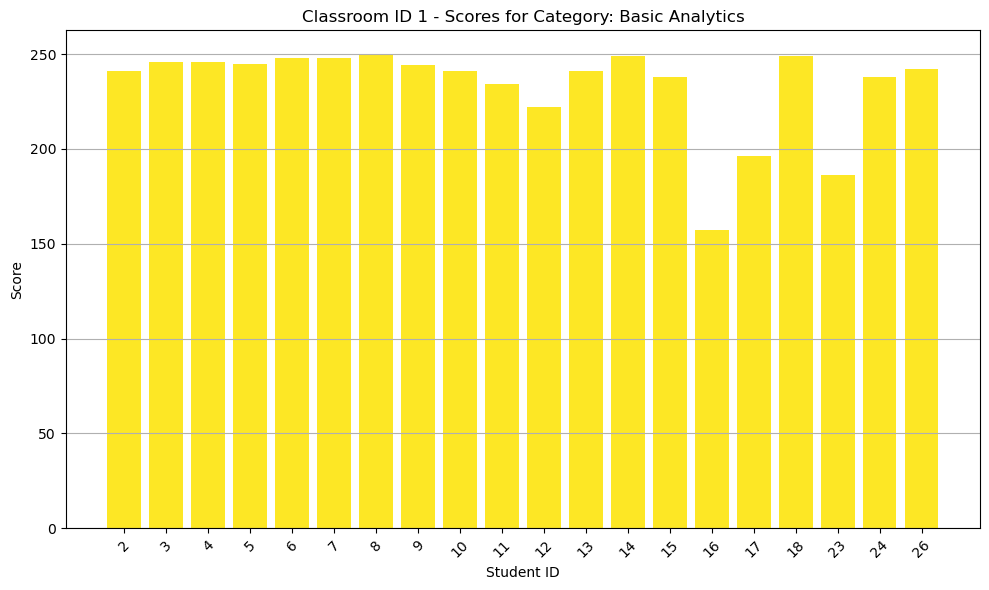

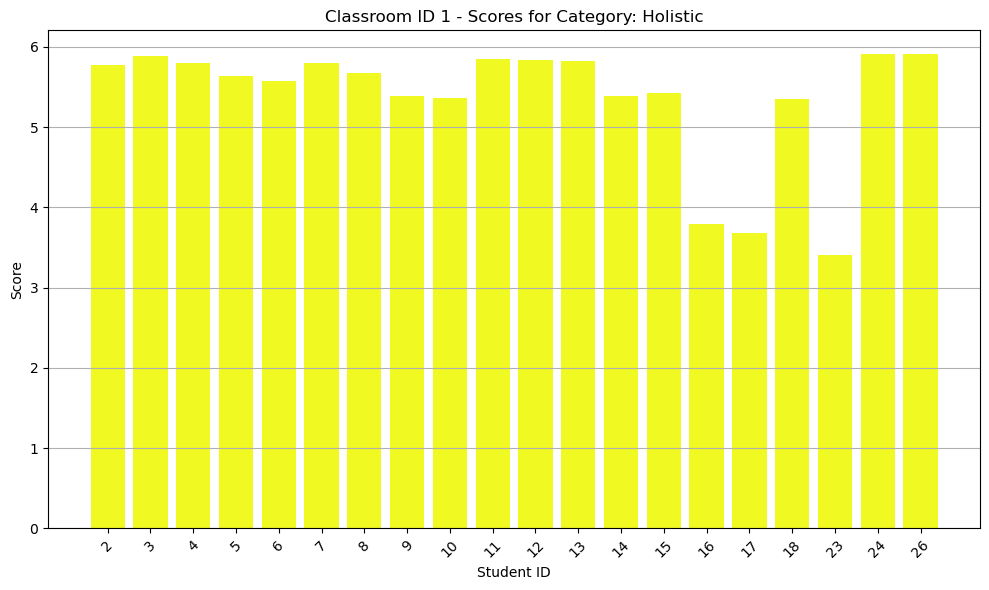

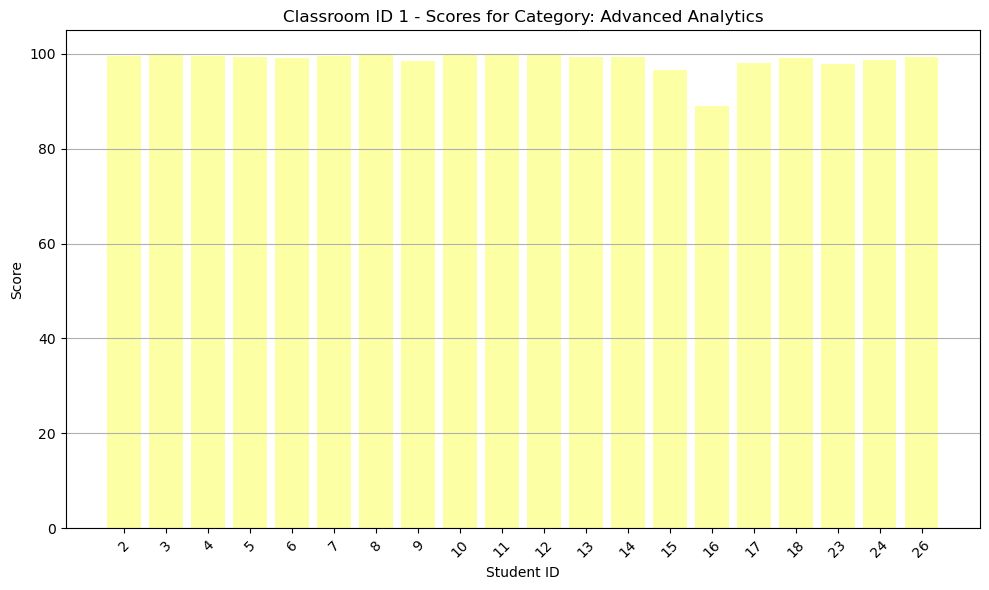

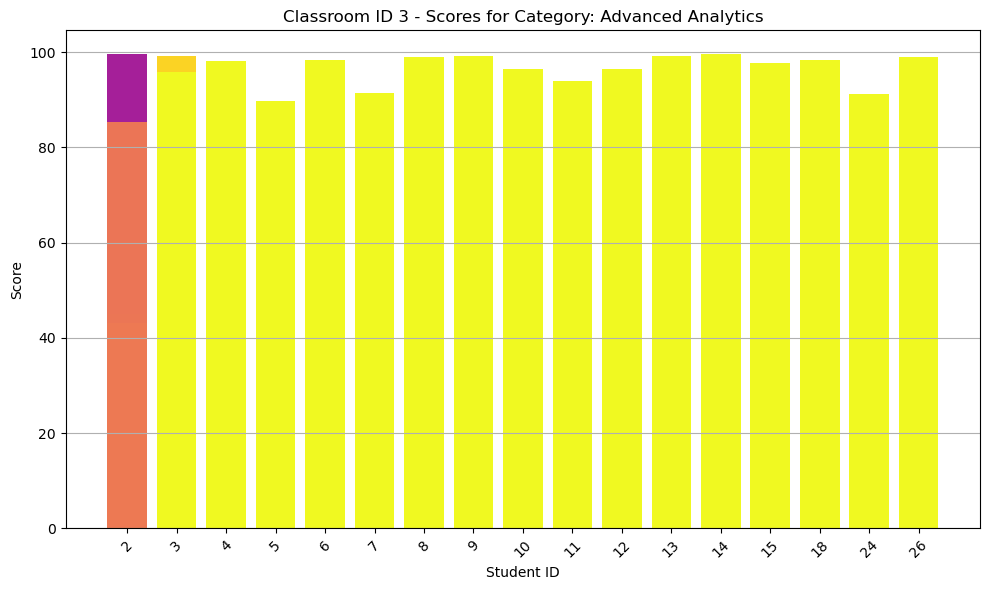

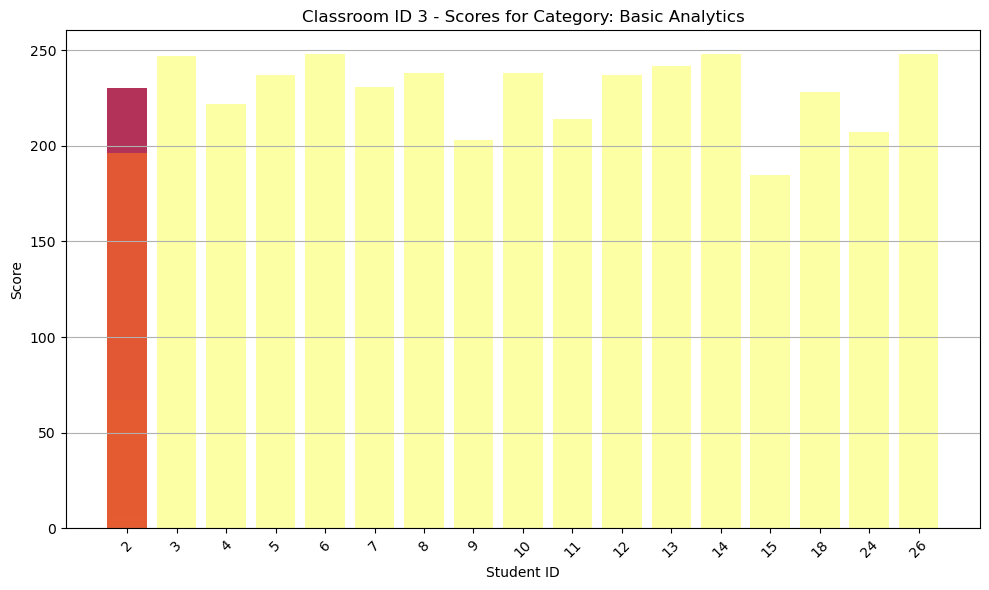

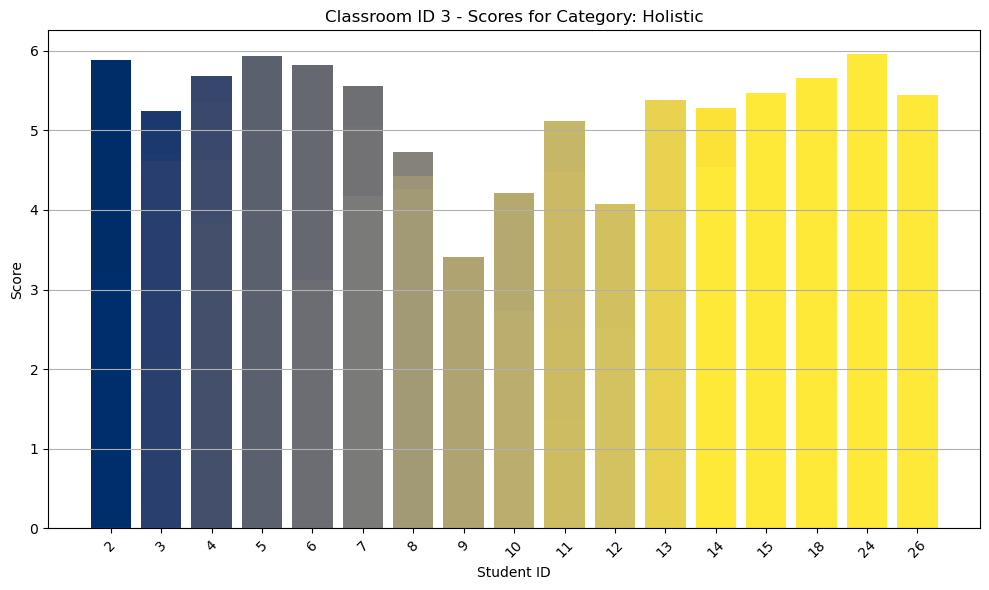

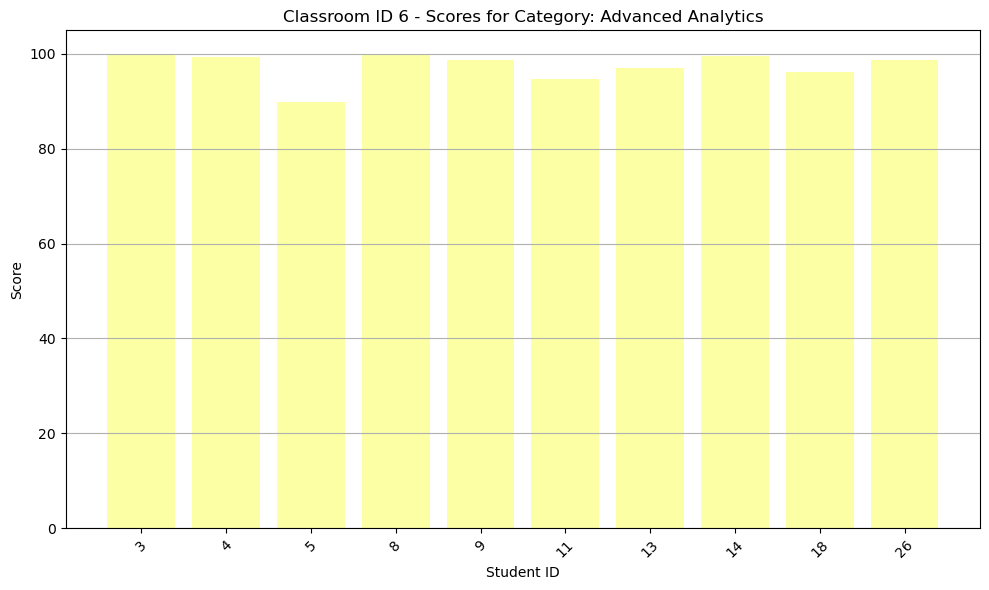

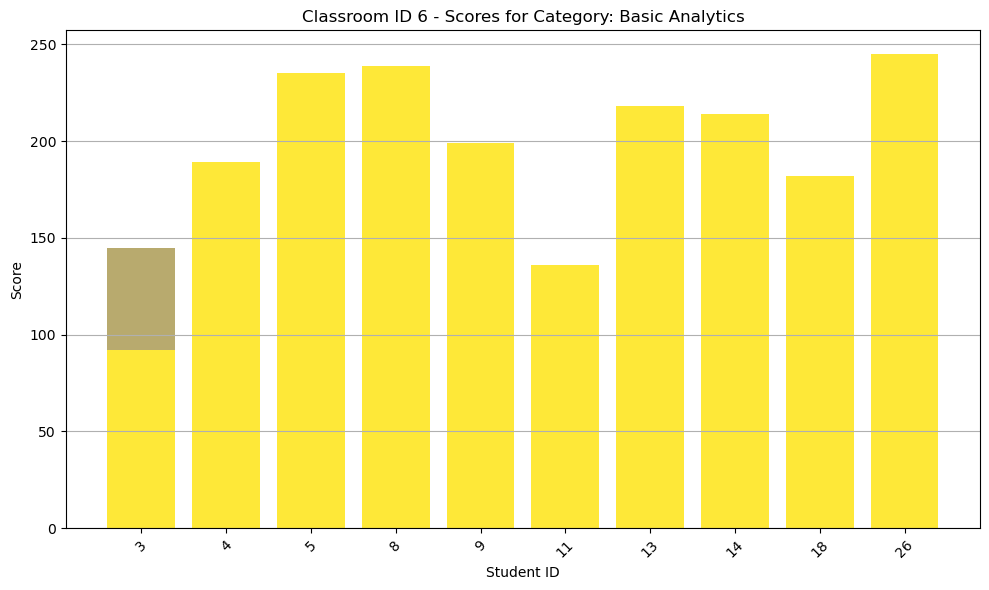

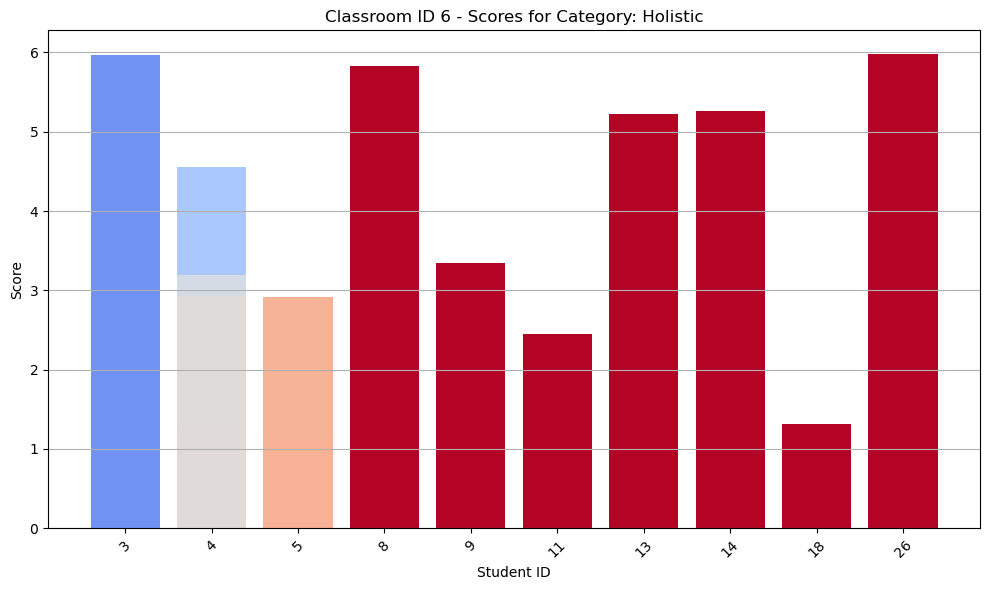

In [430]:
import matplotlib.cm as cm  # To use various color palettes

# Assuming essay_df, essay_score_df, metric_df, metriccategory_df, and classroom_students_df are already loaded

# Merge DataFrames with suffixes to avoid conflicts
merged_essay_score_df = pd.merge(essay_df, essay_score_df, left_on='id', right_on='essay_id', suffixes=('', '_score'))
merged_essay_score_metric_df = pd.merge(merged_essay_score_df, metric_df, left_on='metric_id', right_on='id', suffixes=('', '_metric'))
merged_metric_category_df = pd.merge(merged_essay_score_metric_df, metriccategory_df, left_on='category_id', right_on='id', suffixes=('', '_category'))
merged_essay_classroom_df = pd.merge(merged_metric_category_df, classroom_students_df, left_on='classroom_id', right_on='classroom_id')

# Filter for specified classroom IDs
classroom_ids = [1, 3, 6]

# Define a dictionary to map classroom IDs to their respective unique student IDs
student_ids = {
    1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 26],
    3: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 24, 26],
    6: [3, 4, 5, 8, 9, 11, 13, 14, 18, 26]
}

# Define a list of color maps to use for different graphs
color_maps = ['viridis', 'plasma', 'inferno', 'cividis', 'coolwarm', 'Spectral']

# Plot scores by category for each classroom ID
for idx, classroom_id in enumerate(classroom_ids):
    classroom_data = merged_essay_classroom_df[merged_essay_classroom_df['classroom_id'] == classroom_id]
    
    # Filter data to include only the specified student IDs
    classroom_data = classroom_data[classroom_data['student_id'].isin(student_ids[classroom_id])]
    
    # Plot each category separately
    for i, category in enumerate(classroom_data['name_category'].unique()):
        category_data = classroom_data[classroom_data['name_category'] == category]
        
        # Sort by 'student_id' in ascending order
        category_data = category_data.sort_values(by='student_id', ascending=True)
        
        # Use different color palettes for different graphs
        num_students = len(category_data)
        color_map = plt.get_cmap(color_maps[(idx + i) % len(color_maps)])
        colors = color_map(range(num_students))
        
        plt.figure(figsize=(10, 6))
        plt.bar(category_data['student_id'].astype(str), category_data['score'], color=colors)
        plt.title(f"Classroom ID {classroom_id} - Scores for Category: {category}")
        plt.xlabel("Student ID")
        plt.ylabel("Score")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()